In [1]:

#import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.shape

(7043, 21)

In [7]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [8]:

df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
df['Churn'].value_counts()


No     5174
Yes    1869
Name: Churn, dtype: int64

In [10]:
df['Churn'].value_counts()/len(df)*100


No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

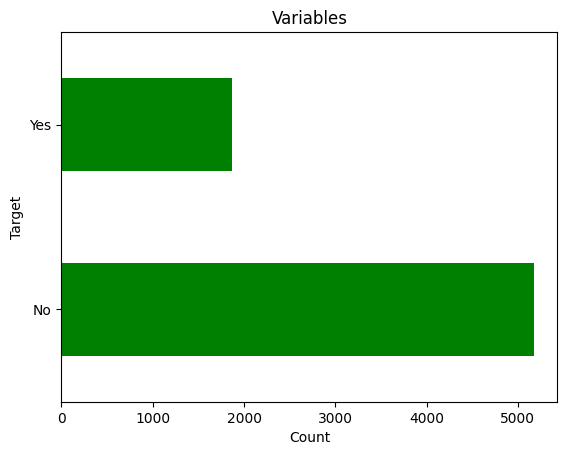

In [11]:
df['Churn'].value_counts().plot(kind='barh',color='green')
plt.xlabel('Count')
plt.ylabel('Target')
plt.title("Variables")
plt.show()




<Axes: ylabel='Churn'>

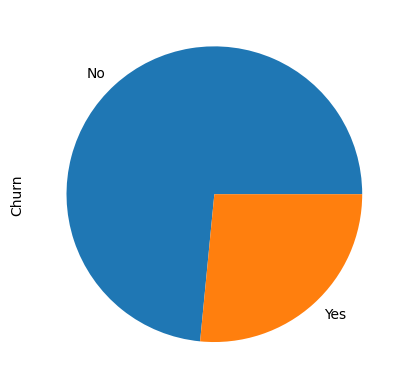

In [12]:
df['Churn'].value_counts().plot(kind='pie')

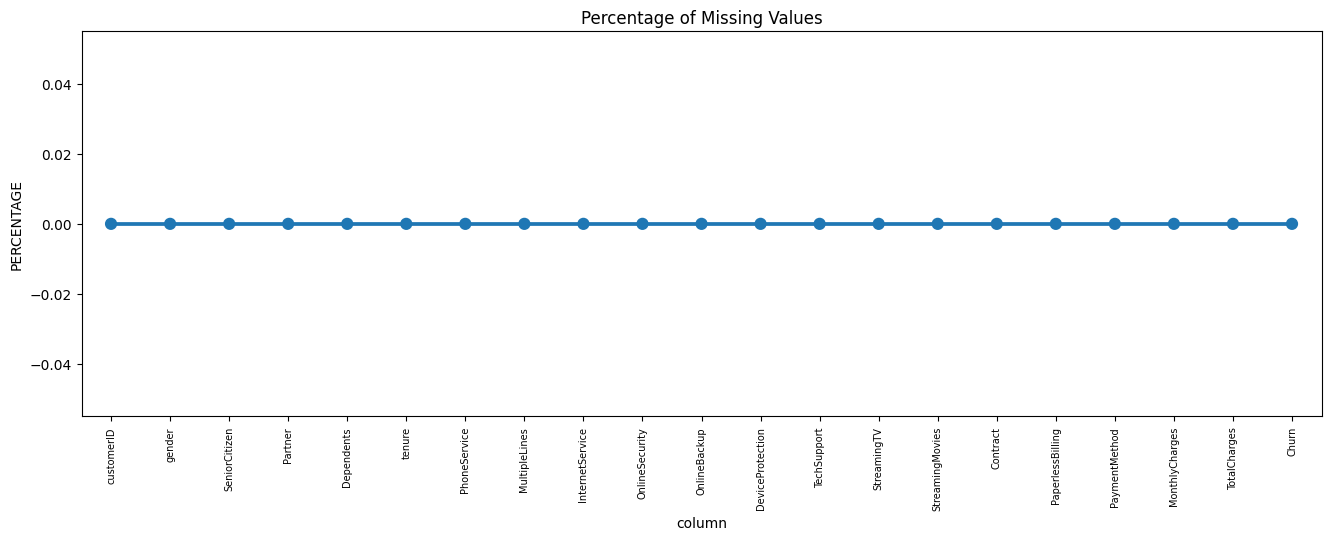

In [13]:
missing = pd.DataFrame((df.isnull().sum()) * 100 / df.shape[0]).reset_index()
missing.columns = ['column', 'missing_percentage']
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='column', y='missing_percentage', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("PERCENTAGE")
plt.show()


In [14]:
new_df=df

In [15]:
#new_df = df.copy()


In [16]:
new_df.TotalCharges = pd.to_numeric(new_df.TotalCharges, errors='coerce')


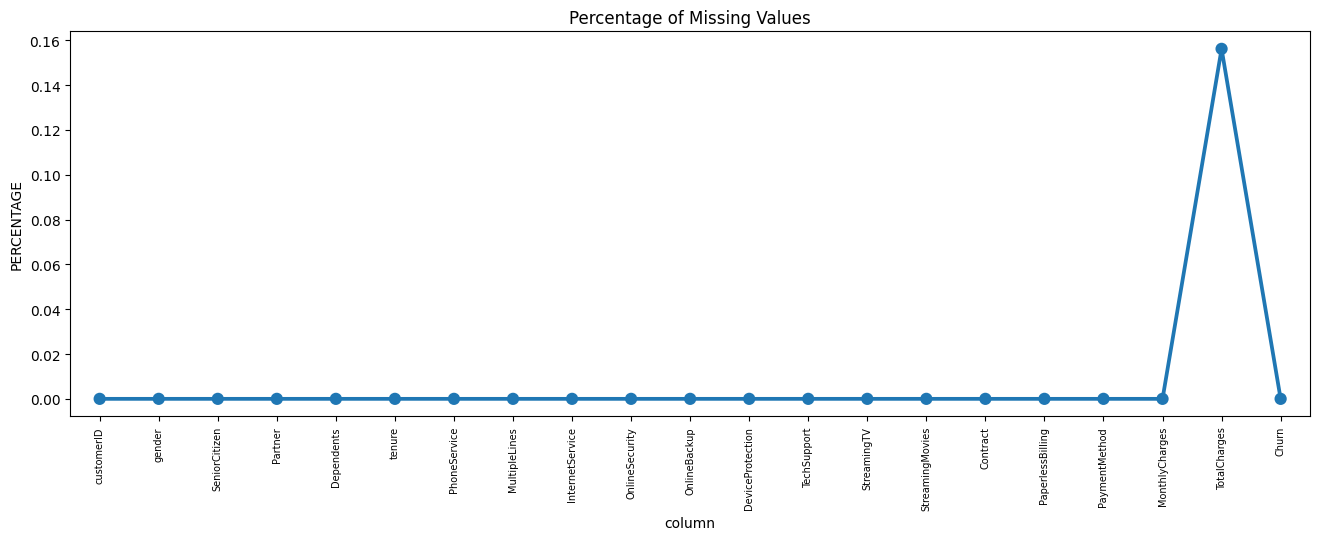

In [17]:
missing = pd.DataFrame((new_df.isnull().sum()) * 100 / new_df.shape[0]).reset_index()
missing.columns = ['column', 'missing_percentage']
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='column', y='missing_percentage', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("PERCENTAGE")
plt.show()

In [18]:
#Removing missing values
new_df.dropna(how = 'any', inplace = True)


In [19]:
# Get the max tenure
print(new_df['tenure'].max()) #72


72


In [20]:
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

print(labels)


['1 - 12', '13 - 24', '25 - 36', '37 - 48', '49 - 60', '61 - 72']


In [21]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

new_df['tenure_group'] = pd.cut(new_df.tenure, range(1, 80, 12), right=False, labels=labels)


In [22]:
new_df['tenure_group'].value_counts()


1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

In [23]:
new_df.drop(columns= ['customerID','tenure'], axis=1, inplace=True)

In [24]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [25]:
new_df.head(5)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [26]:
new_df.Churn.value_counts()/len(new_df)*100

No     73.421502
Yes    26.578498
Name: Churn, dtype: float64

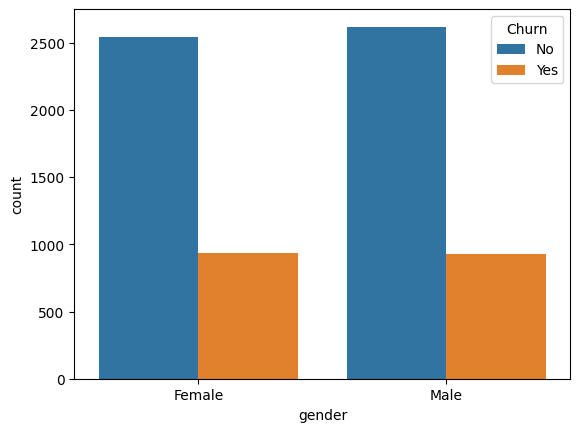

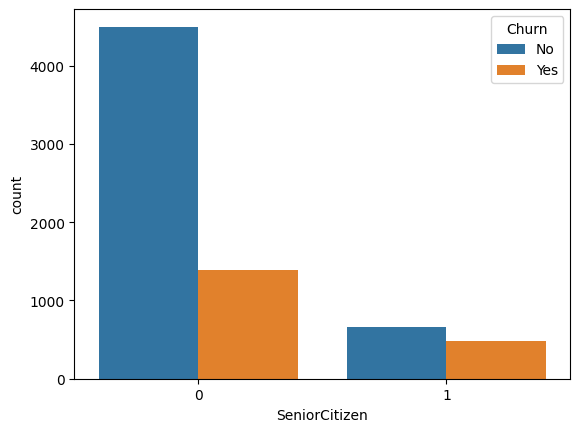

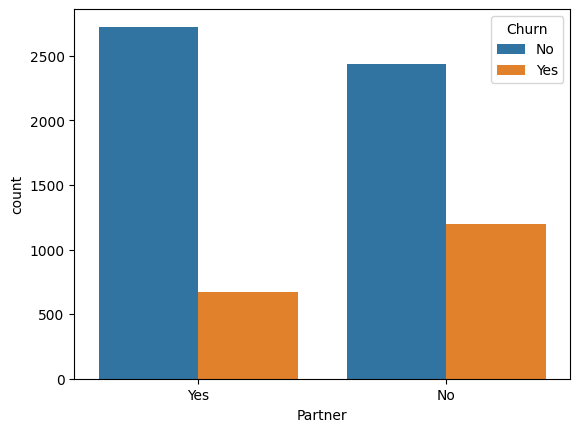

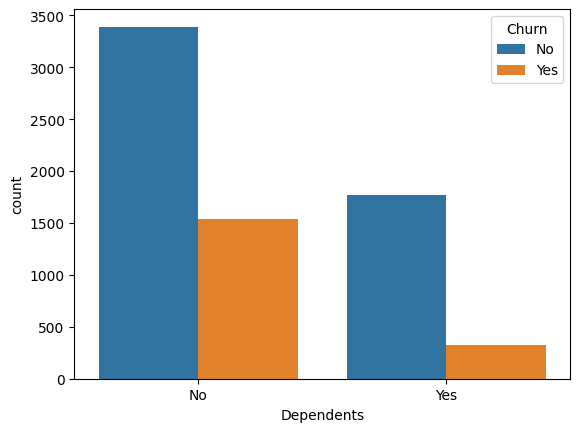

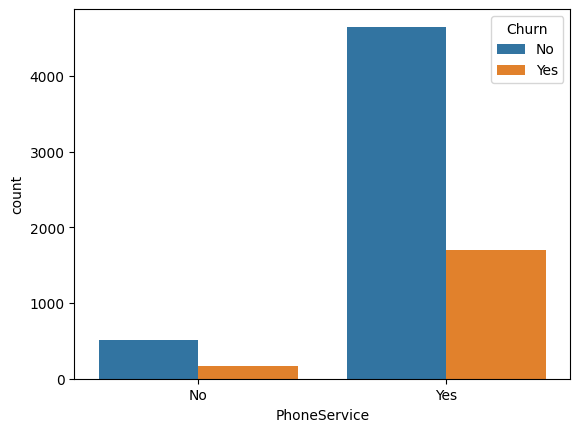

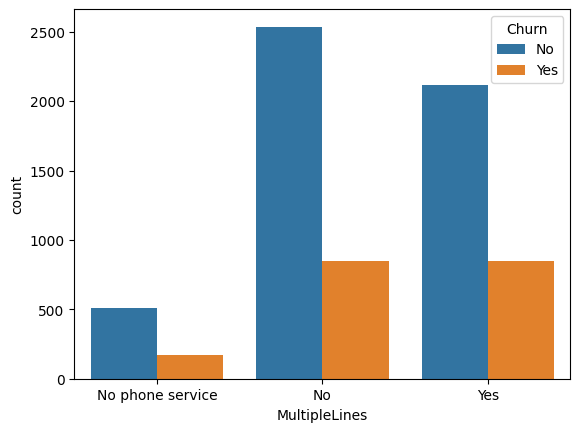

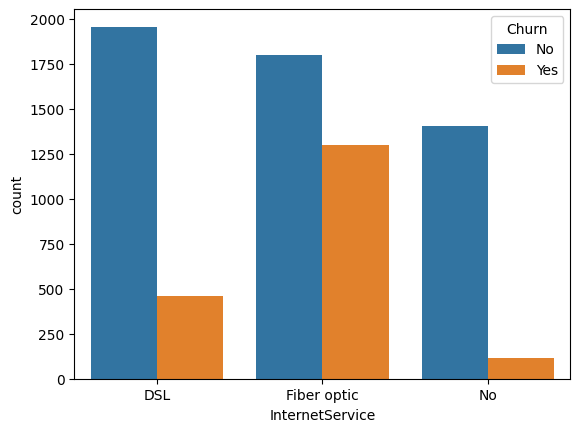

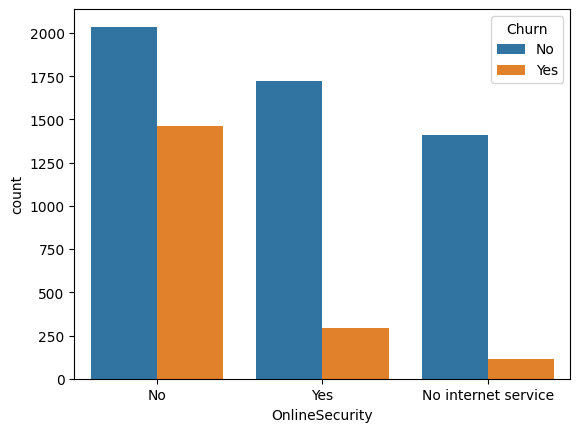

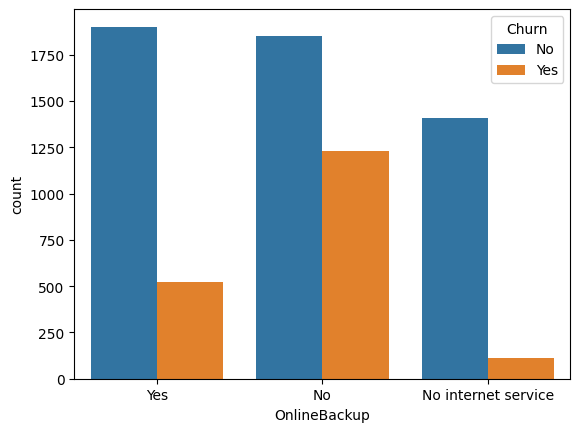

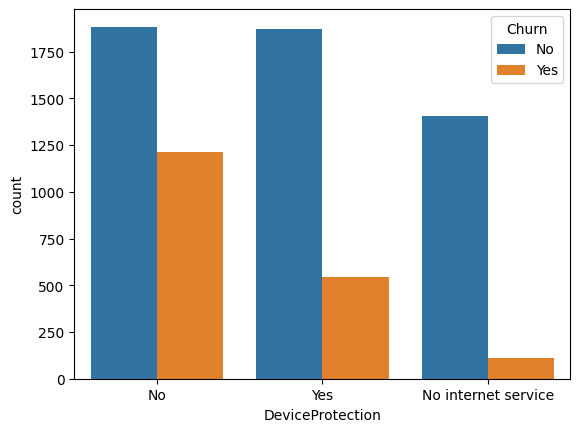

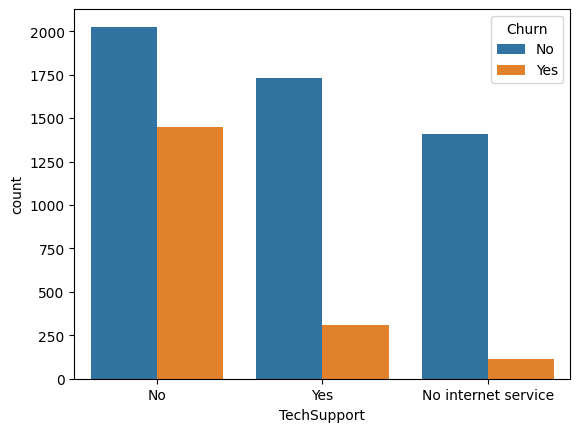

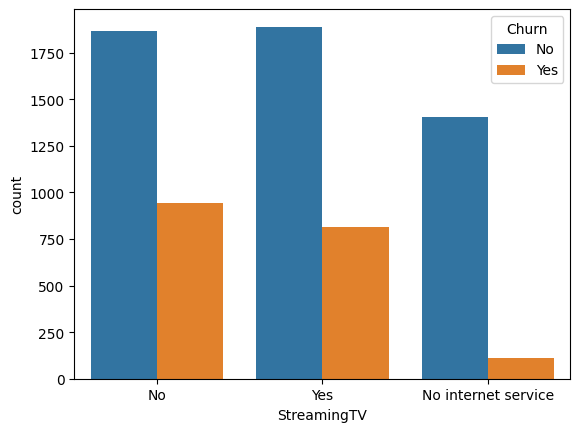

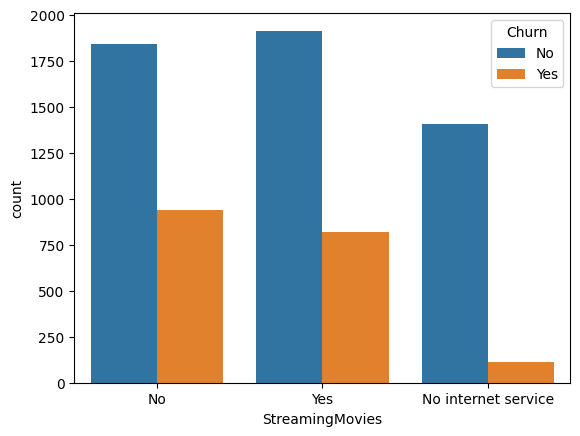

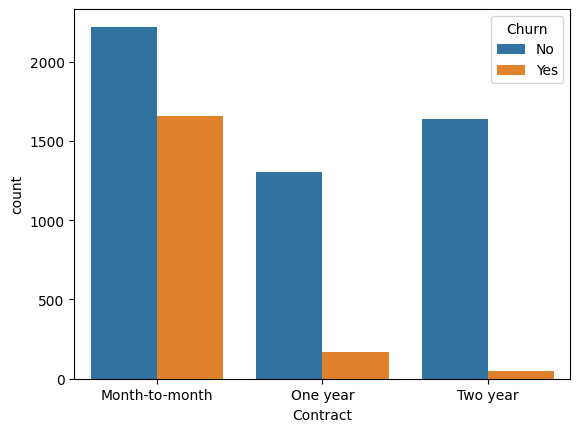

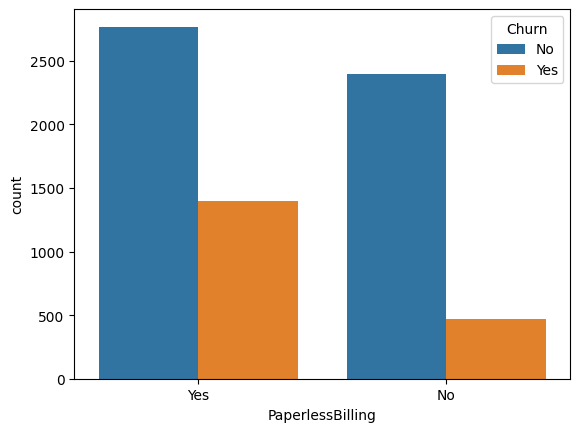

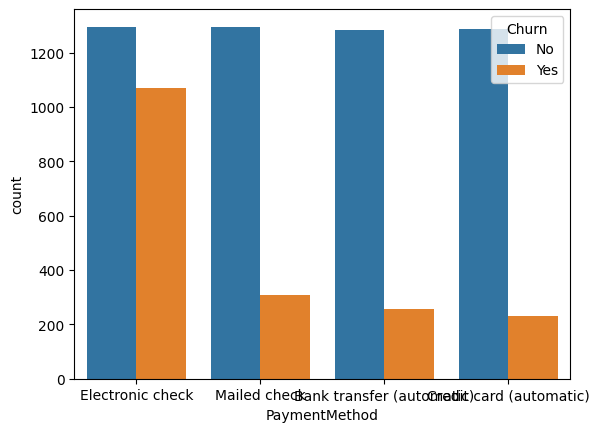

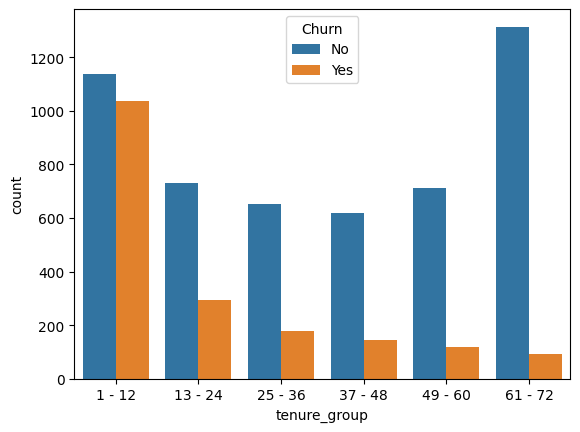

In [27]:
for i, predictor in enumerate(new_df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=new_df, x=predictor, hue='Churn')


In [28]:
new_df.SeniorCitizen.value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

In [29]:
new_df1_target0=new_df[new_df["Churn"]=='No']
new_df1_target1=new_df[new_df["Churn"]=='Yes']

In [30]:
new_df1_target1.SeniorCitizen.value_counts()

0    1393
1     476
Name: SeniorCitizen, dtype: int64

In [31]:
new_df.gender.value_counts()

Male      3549
Female    3483
Name: gender, dtype: int64

In [32]:
new_df1_target1.gender.value_counts()

Female    939
Male      930
Name: gender, dtype: int64

In [33]:
new_df.Partner.value_counts()

No     3639
Yes    3393
Name: Partner, dtype: int64

In [34]:
new_df1_target1.Partner.value_counts()

No     1200
Yes     669
Name: Partner, dtype: int64

In [35]:
new_df.Dependents.value_counts()

No     4933
Yes    2099
Name: Dependents, dtype: int64

In [36]:
new_df1_target1.Dependents.value_counts()

No     1543
Yes     326
Name: Dependents, dtype: int64

In [37]:
new_df.PhoneService.value_counts()

Yes    6352
No      680
Name: PhoneService, dtype: int64

In [38]:
new_df1_target1.PhoneService.value_counts()

Yes    1699
No      170
Name: PhoneService, dtype: int64

In [39]:
new_df.MultipleLines.value_counts()

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

In [40]:
new_df1_target1.MultipleLines.value_counts()

Yes                 850
No                  849
No phone service    170
Name: MultipleLines, dtype: int64

In [41]:
new_df.InternetService.value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [42]:
new_df1_target1.InternetService.value_counts()

Fiber optic    1297
DSL             459
No              113
Name: InternetService, dtype: int64

In [43]:
new_df.OnlineSecurity.value_counts()

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

In [44]:
new_df1_target1.OnlineSecurity.value_counts()

No                     1461
Yes                     295
No internet service     113
Name: OnlineSecurity, dtype: int64

In [45]:
new_df.OnlineBackup.value_counts()

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64

In [46]:
new_df1_target1.value_counts()

gender  SeniorCitizen  Partner  Dependents  PhoneService  MultipleLines  InternetService  OnlineSecurity       OnlineBackup         DeviceProtection     TechSupport          StreamingTV          StreamingMovies      Contract        PaperlessBilling  PaymentMethod              MonthlyCharges  TotalCharges  Churn  tenure_group
Male    0              No       No          Yes           No             No               No internet service  No internet service  No internet service  No internet service  No internet service  No internet service  Month-to-month  Yes               Mailed check               20.20           20.20         Yes    1 - 12          2
                                                                         DSL              No                   No                   No                   No                   No                   No                   Month-to-month  Yes               Mailed check               45.70           45.70         Yes    1 - 12          2
         

In [47]:
new_df.DeviceProtection.value_counts()

No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64

In [48]:
new_df1_target1.DeviceProtection.value_counts()

No                     1211
Yes                     545
No internet service     113
Name: DeviceProtection, dtype: int64

In [49]:
new_df.TechSupport.value_counts()

No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64

In [50]:
new_df1_target1.TechSupport.value_counts()

No                     1446
Yes                     310
No internet service     113
Name: TechSupport, dtype: int64

In [51]:
new_df.StreamingTV.value_counts()

No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64

In [52]:
new_df1_target1.StreamingTV.value_counts()

No                     942
Yes                    814
No internet service    113
Name: StreamingTV, dtype: int64

In [53]:
new_df.StreamingMovies.value_counts()

No                     2781
Yes                    2731
No internet service    1520
Name: StreamingMovies, dtype: int64

In [54]:
new_df1_target1.StreamingMovies.value_counts()

No                     938
Yes                    818
No internet service    113
Name: StreamingMovies, dtype: int64

In [55]:
new_df. Contract.value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

In [56]:
new_df1_target1.Contract.value_counts()

Month-to-month    1655
One year           166
Two year            48
Name: Contract, dtype: int64

In [57]:
new_df.PaperlessBilling.value_counts()

Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64

In [58]:
new_df1_target1.PaperlessBilling.value_counts()

Yes    1400
No      469
Name: PaperlessBilling, dtype: int64

In [59]:
new_df.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

In [60]:
new_df1_target1.PaymentMethod.value_counts()

Electronic check             1071
Mailed check                  308
Bank transfer (automatic)     258
Credit card (automatic)       232
Name: PaymentMethod, dtype: int64

In [61]:
new_df.tenure_group.value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

In [62]:
new_df1_target1.tenure_group.value_counts()

1 - 12     1037
13 - 24     294
25 - 36     180
37 - 48     145
49 - 60     120
61 - 72      93
Name: tenure_group, dtype: int64

In [63]:
pd.crosstab(new_df.PaymentMethod, new_df.Churn)

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1284,258
Credit card (automatic),1289,232
Electronic check,1294,1071
Mailed check,1296,308


### Univariate Analysis



- Senior citizens are more likekly to churn (churn rate - 41.68%).
- The univariate analysis with respect to Gender does not seem to have any pronounced effect on churn as both males and females have similar churn rates(26%).
- Customers without partner are more likely to churn(~ 33%)as compared to customers with partners(19.7%).
- Churn is more likely to occur with customers without any dependents(31.3%) than those who have dependents(15.5%).
- The PhoneService seems to have insignificant effect on churning in univariate analysis as both users with and without phone service have almost similar churn rate ~25-26%.
- Churn possibilty is slighly more( ~ 28.6%) with Multiple lines as compared to users with single line or without phoneservice but impact is insignificant.
- Customers without internet service are less likely to churn(7.4%) and among internet service users, those using fibre optic are more likely to churn ~42%.
- Consumers are more likely to churn in the absence of Online security(41.7%).
- In case of unavailablity of Online Backup, users are more likely to churn (~40%).
- In the absence of Device protection, users are more likely to churn (39%).
- Churns are more likely to happen without Tech support(41.6%).
- Customers with /without Streaming TV are more likely to churn with churn rate slighlty higher in case of no Streaming TV(33%).
- Customers with /without Streaming Movies are more likely to churn with churn rate slighlty higher in case of no Streaming Movies(33.7%).
- Month-to-month contract are more likely to churn~42.7%.
- Paperless billing are more likely to churn(33.6%).
- Consumers opting for Electronic check payment method are more likely to churn
(45.28%).
- Tenure group falling within 1-12 months are more likely to churn(47.68%).











In [64]:
# Converting 'Churn' to numeric
new_df['Churn'] = np.where(new_df.Churn == 'Yes',1,0)

In [65]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [66]:
#Dummies
new_df_dummies = pd.get_dummies(new_df)
new_df_dummies.head()


,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


##Relationship between Monthly Charges and Total Charges

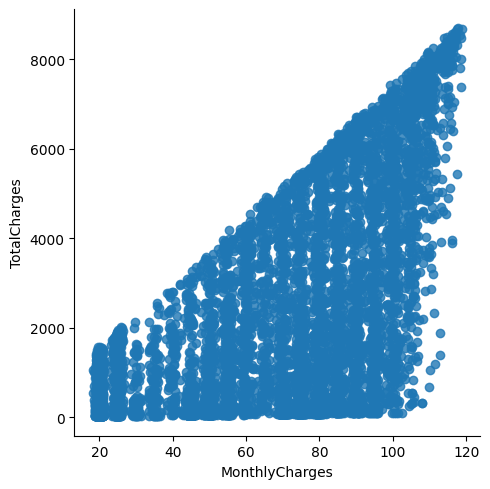

In [67]:
sns.lmplot(data=new_df_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

In [68]:
new_df_dummies['MonthlyCharges'].corr(new_df_dummies['TotalCharges'])

0.6510648032262027

####Total charges increases as monthly charges increases

## Churn by Monthly Charges and Total Charges

<ipython-input-69-510154be176a>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies["Churn"] == 0) ],
<ipython-input-69-510154be176a>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies["Churn"] == 1) ],


Text(0.5, 1.0, 'Monthly charges by churn')

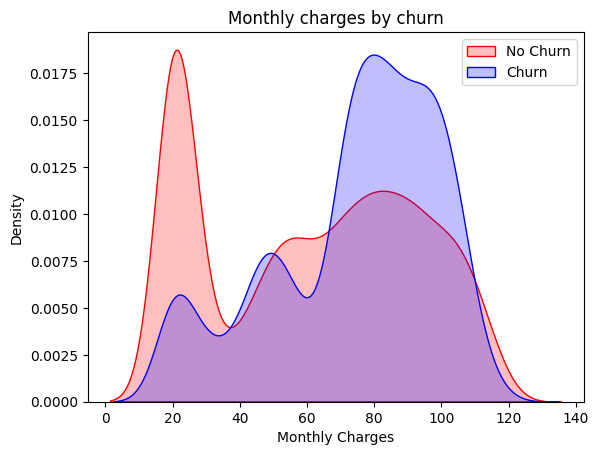

In [69]:
Mth = sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

###Insight: Churn is high when Monthly Charges ar high

<ipython-input-70-03921314fadb>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies["Churn"] == 0) ],
<ipython-input-70-03921314fadb>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies["Churn"] == 1) ],


Text(0.5, 1.0, 'Total charges by churn')

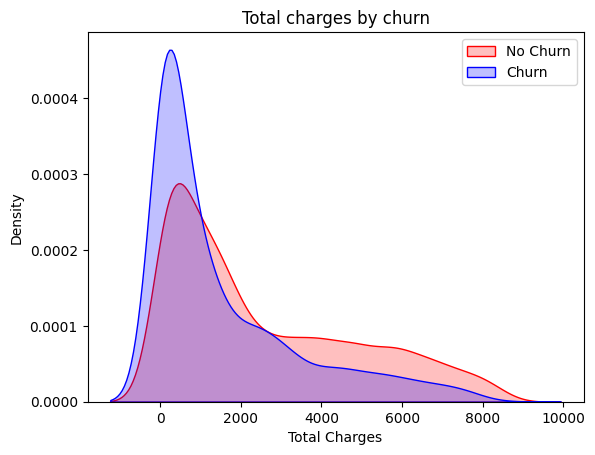

In [70]:
Tot = sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

In [71]:
###Higher Churn at lower Total Charges, it simply means older customers are less likely to churn
###Higher Monthly Charge, Lower tenure and Lower Total Charge are linkd to High Churn.

##Corelation of all predictors with 'Churn'

<Axes: >

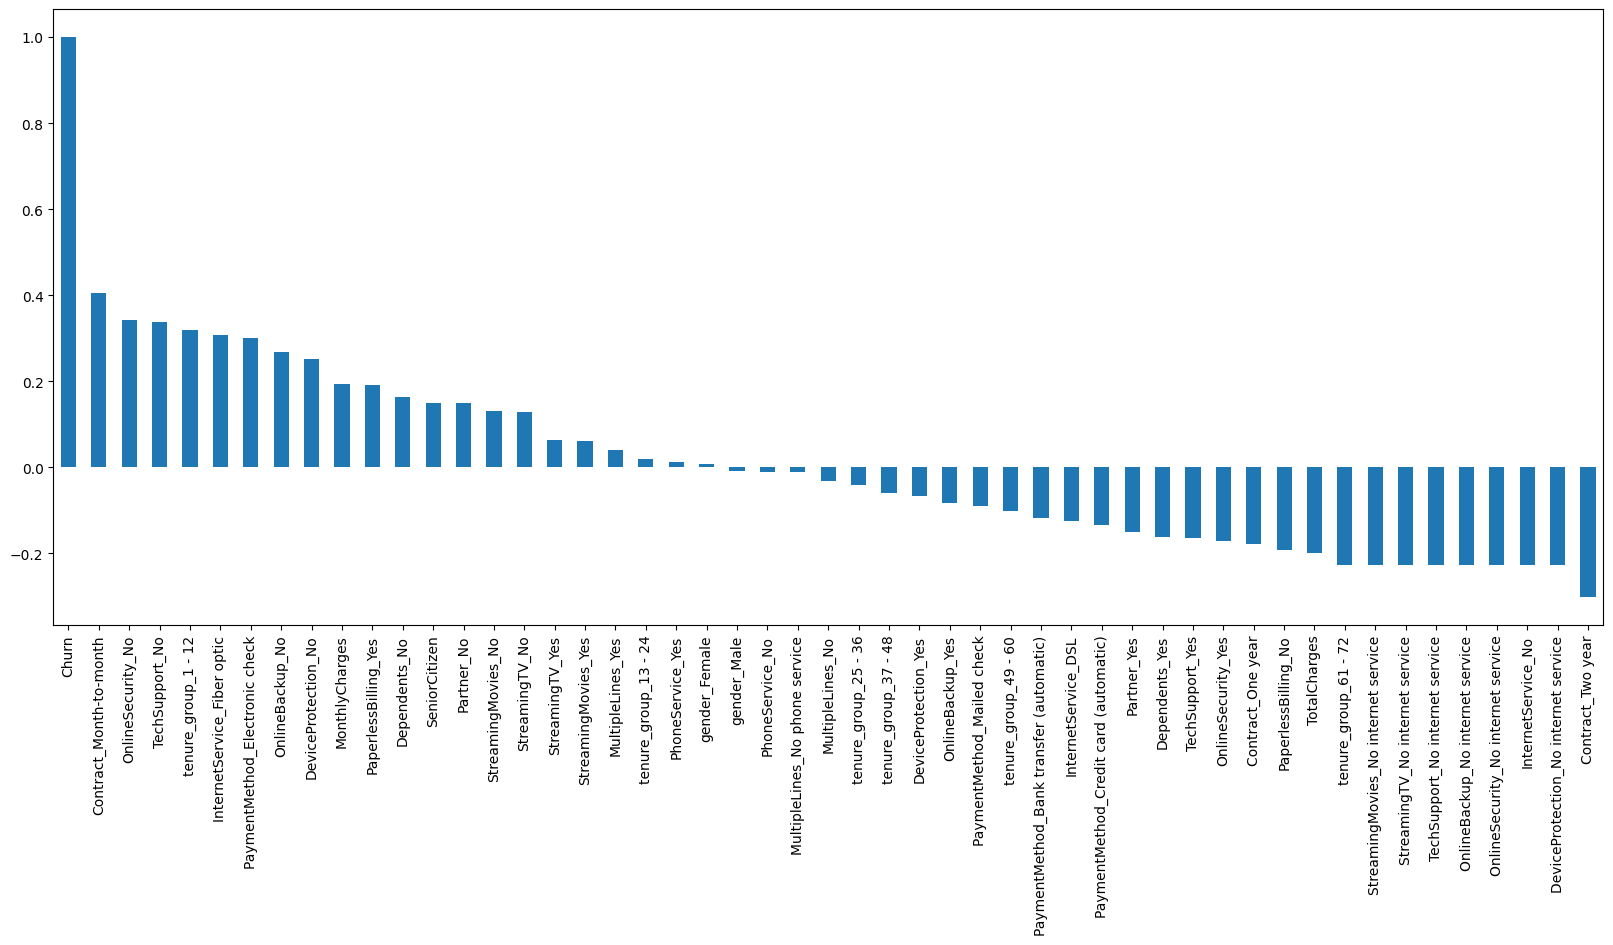

In [72]:
plt.figure(figsize=(20,8))
new_df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [73]:
plt.figure(figsize=(20,8))
new_df_dummies.corr()['Churn'].sort_values(ascending = False)

Churn                                      1.000000
Contract_Month-to-month                    0.404565
OnlineSecurity_No                          0.342235
TechSupport_No                             0.336877
tenure_group_1 - 12                        0.319628
InternetService_Fiber optic                0.307463
PaymentMethod_Electronic check             0.301455
OnlineBackup_No                            0.267595
DeviceProtection_No                        0.252056
MonthlyCharges                             0.192858
PaperlessBilling_Yes                       0.191454
Dependents_No                              0.163128
SeniorCitizen                              0.150541
Partner_No                                 0.149982
StreamingMovies_No                         0.130920
StreamingTV_No                             0.128435
StreamingTV_Yes                            0.063254
StreamingMovies_Yes                        0.060860
MultipleLines_Yes                          0.040033
tenure_group

<Figure size 2000x800 with 0 Axes>

#Derived Insight:

HIGH Churn seen in : Month to month contracts, No online security, No Tech support, First year of subscription, Fibre Optics Internet, Electronic check payments, No online backup and No device protection.

LOW Churn is seen in: Long term contracts(the customers engaged for 5+ years) and Subscriptions without Internet services.

NO impact: Factors like Gender, Availability of PhoneService and  multiple lines have insignificantimpact on churn.

This is also evident from the Heatmap below

<Axes: >

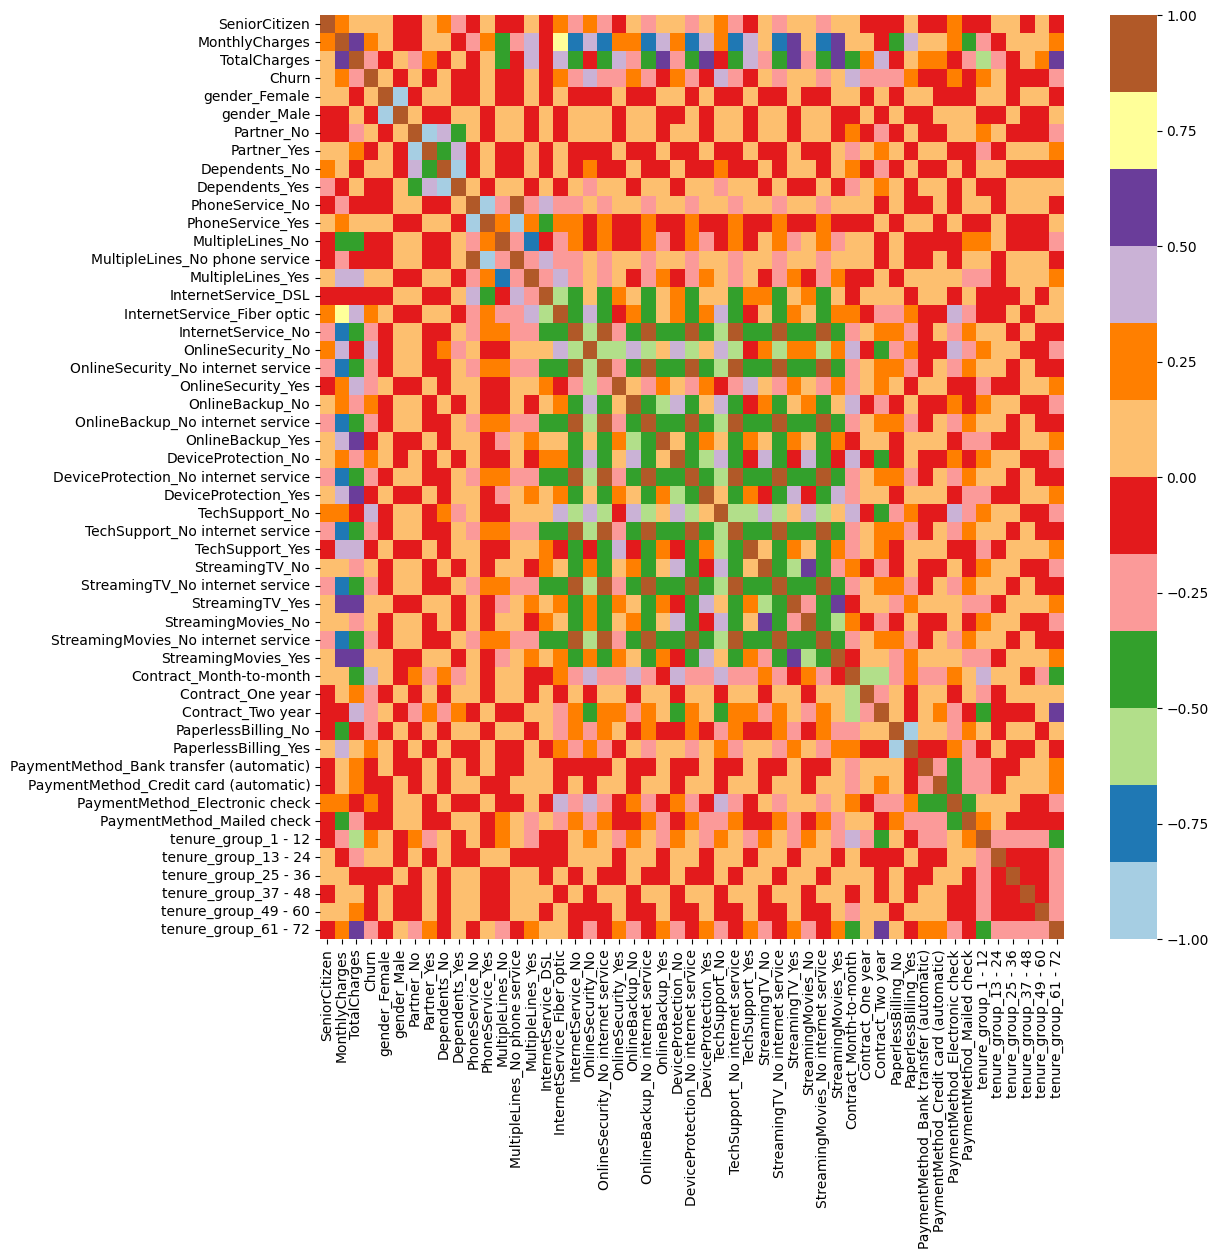

In [74]:
plt.figure(figsize=(12,12))
sns.heatmap(new_df_dummies.corr(), cmap="Paired")

##Bivariate Analysis

In [75]:
new_df1_target0=new_df.loc[new_df["Churn"]==0] #Active Customers
new_df1_target1=new_df.loc[new_df["Churn"]==1] #Churned Customers

In [76]:
len(new_df1_target0)

5163

In [77]:
len(new_df1_target1)

1869

In [78]:
def uniplot(df,col,title,hue =None):

    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30


    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright')


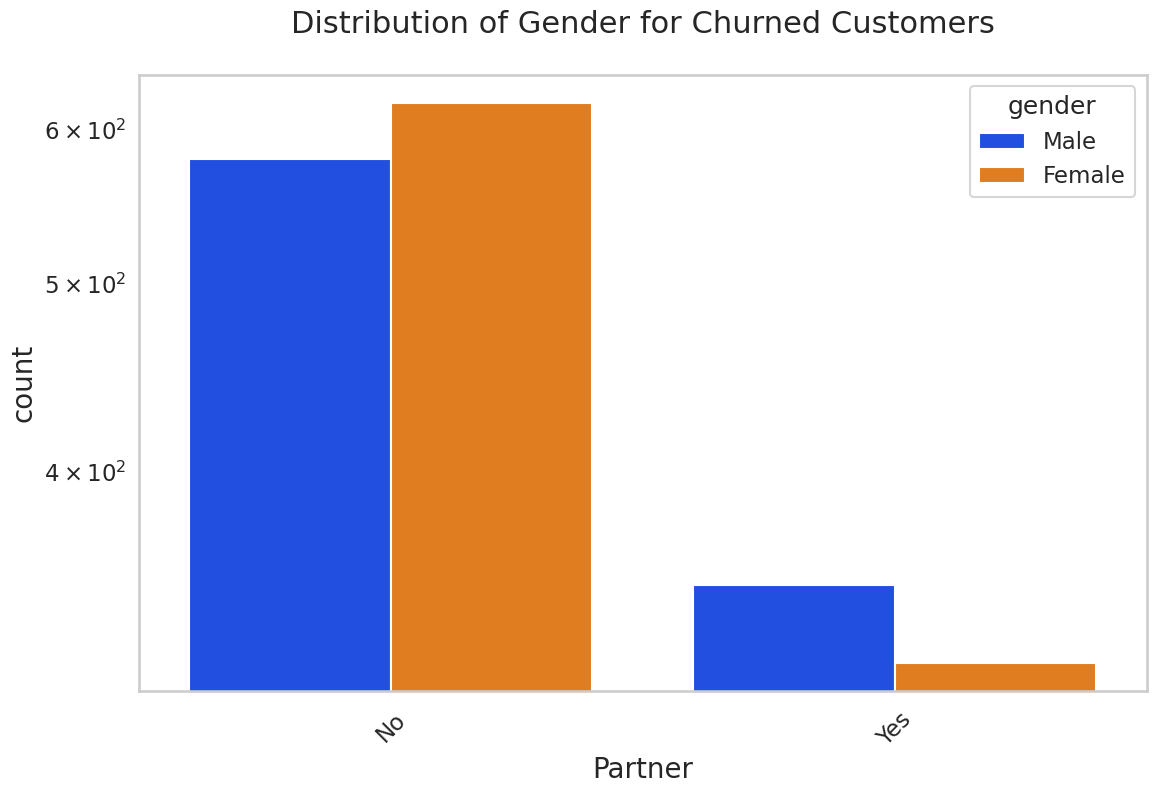

In [79]:
uniplot(new_df1_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

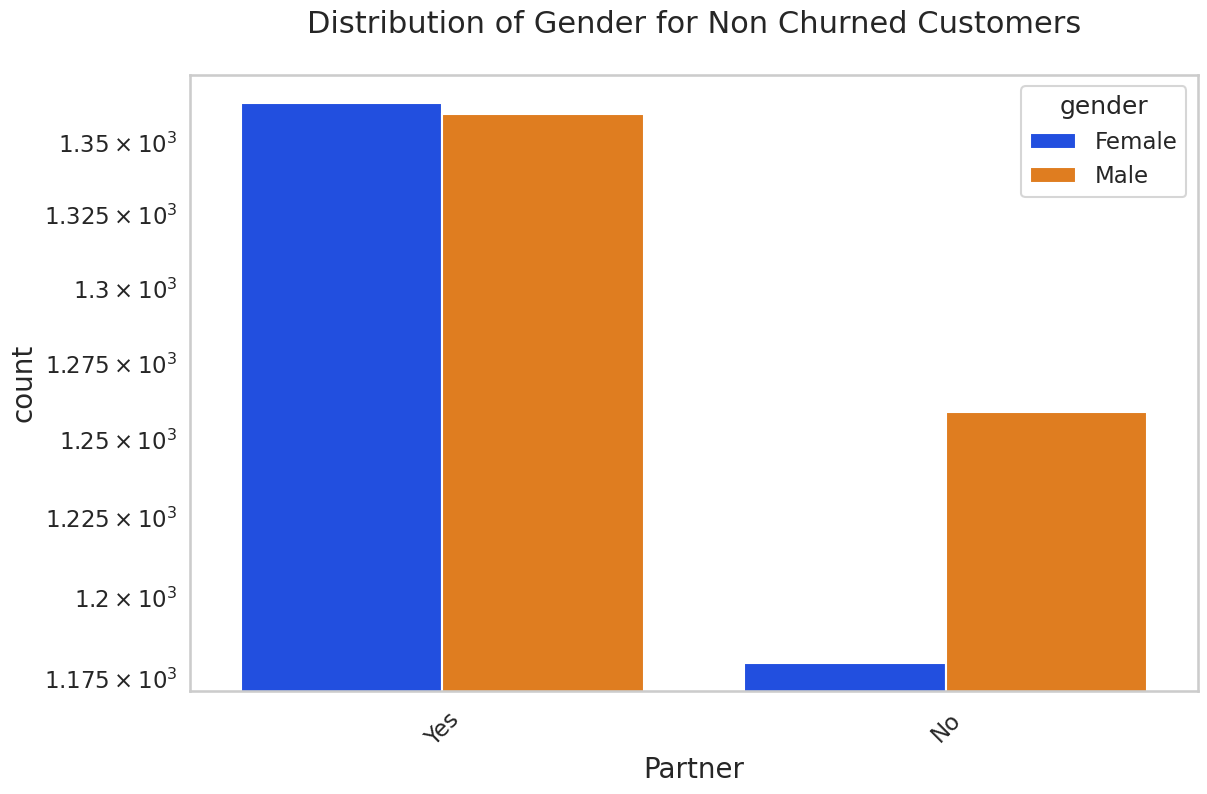

In [80]:
uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

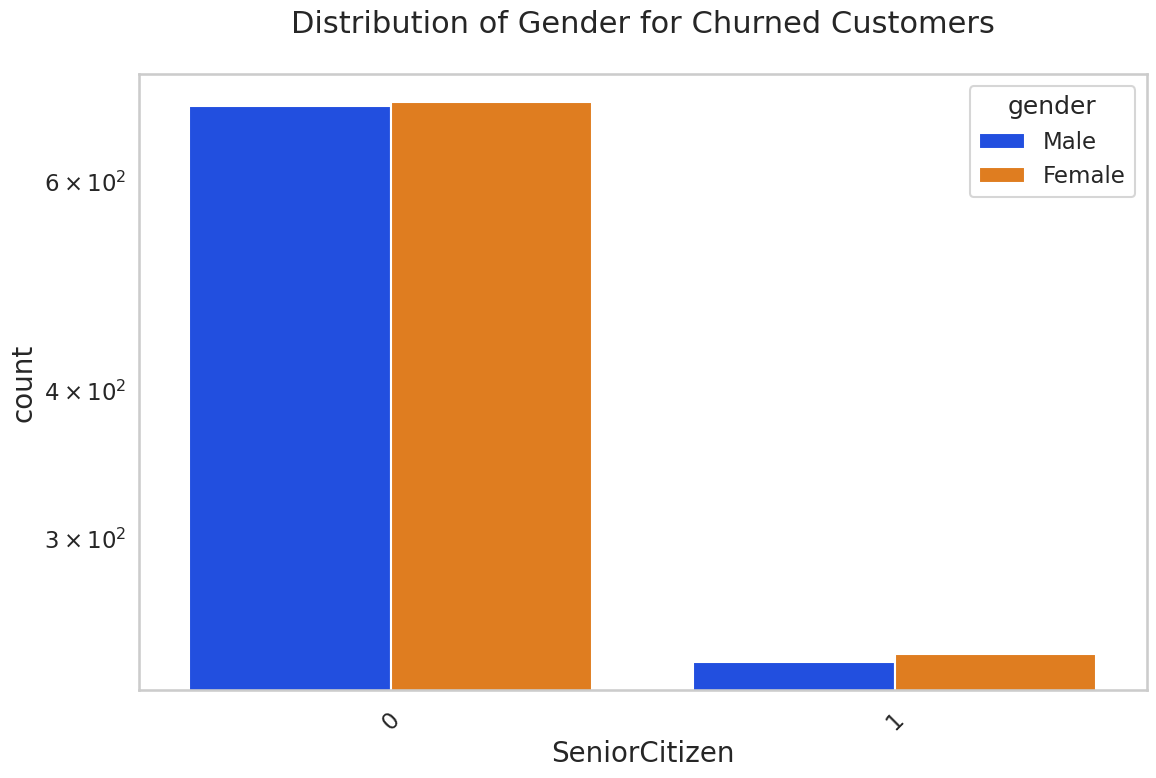

In [81]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of Gender for Churned Customers',hue='gender')

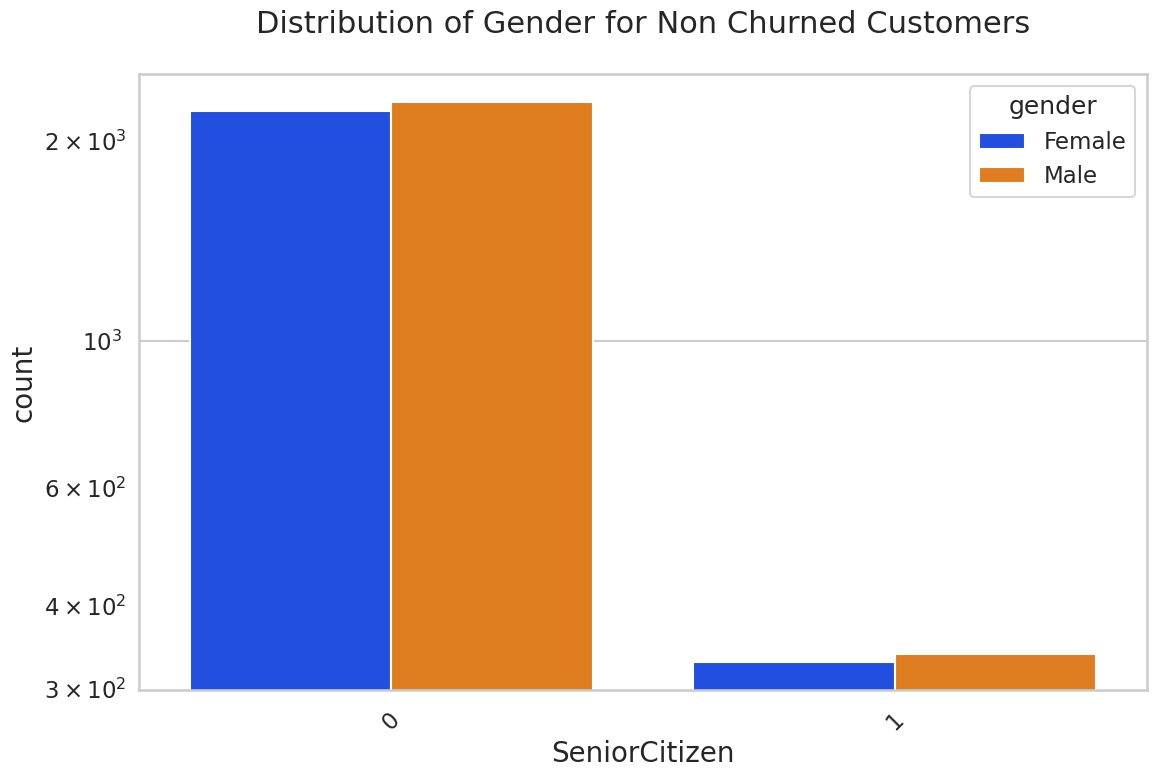

In [82]:
uniplot(new_df1_target0,col='SeniorCitizen',title='Distribution of Gender for Non Churned Customers',hue='gender')

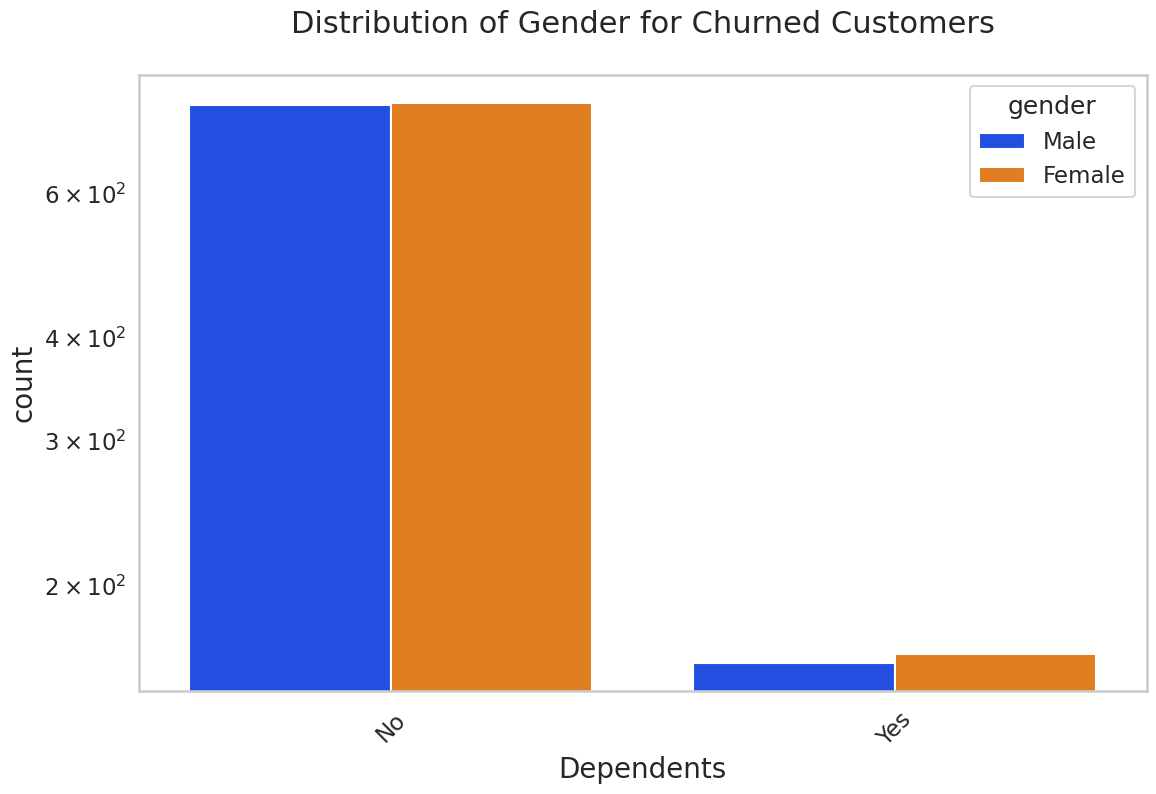

In [83]:
uniplot(new_df1_target1,col='Dependents',title='Distribution of Gender for Churned Customers',hue='gender')

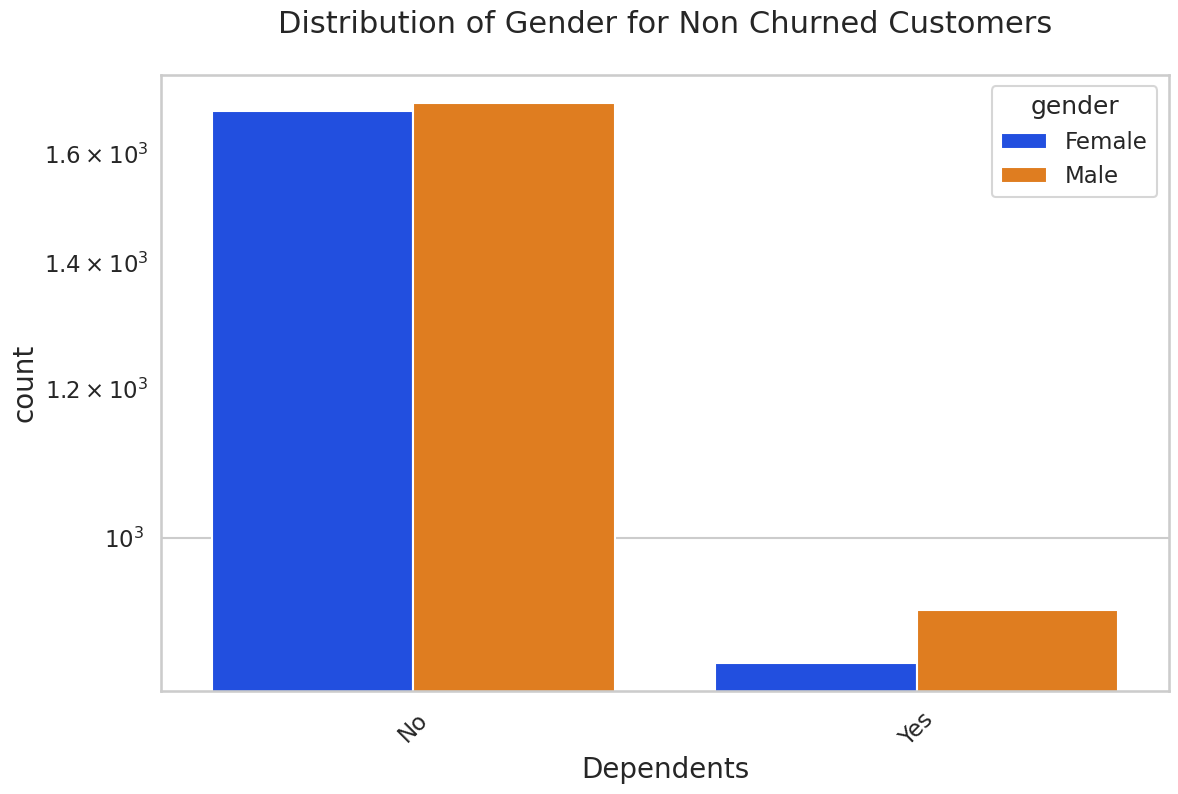

In [84]:
uniplot(new_df1_target0,col='Dependents',title='Distribution of Gender for Non Churned Customers',hue='gender')

##Gender does not have any significant impact on tendancy to churn.

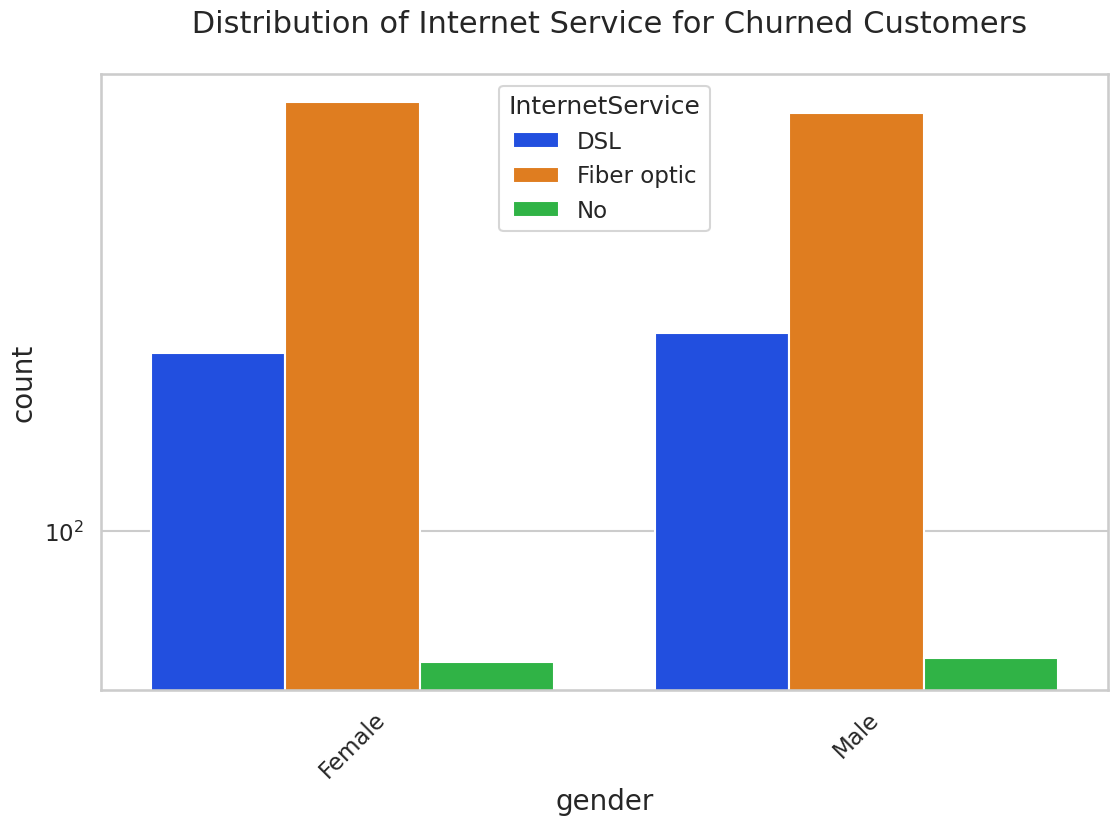

In [85]:
uniplot(new_df1_target1,col='gender',title=' Distribution of Internet Service for Churned Customers',hue='InternetService')

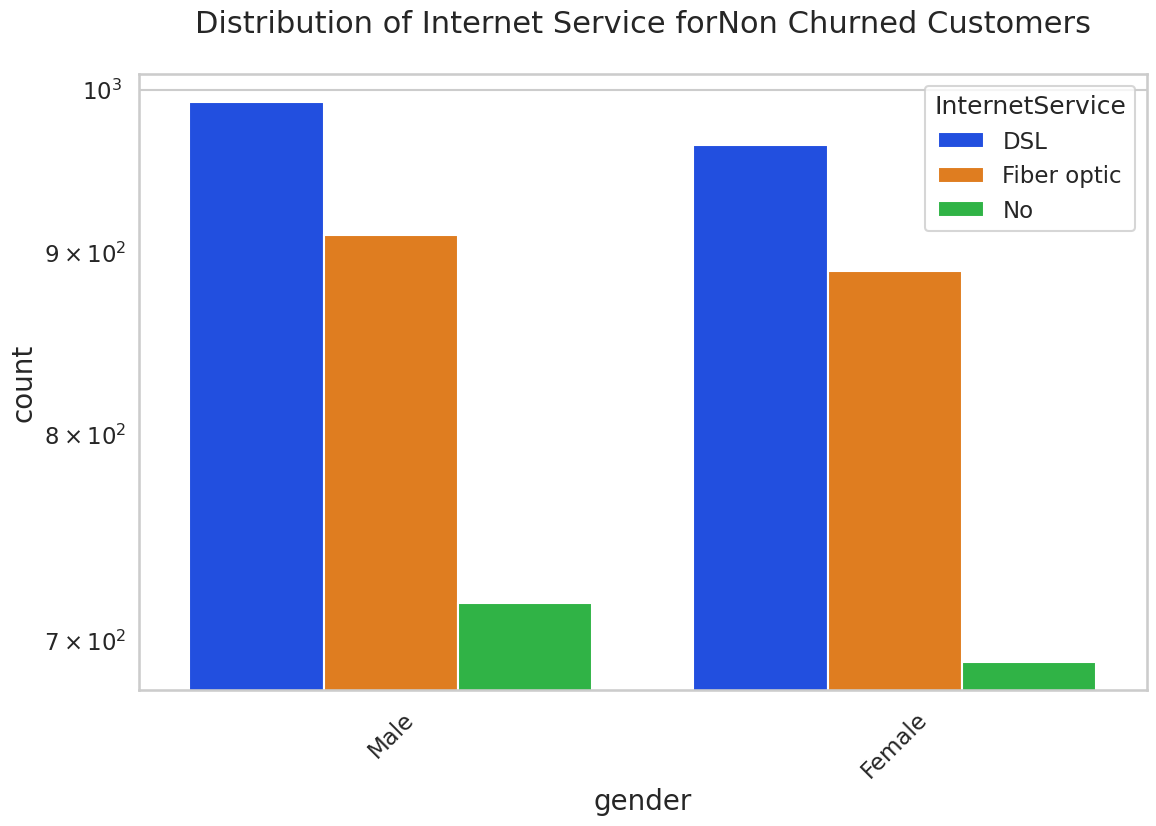

In [86]:
uniplot(new_df1_target0,col='gender',title='Distribution of Internet Service forNon Churned Customers',hue='InternetService')

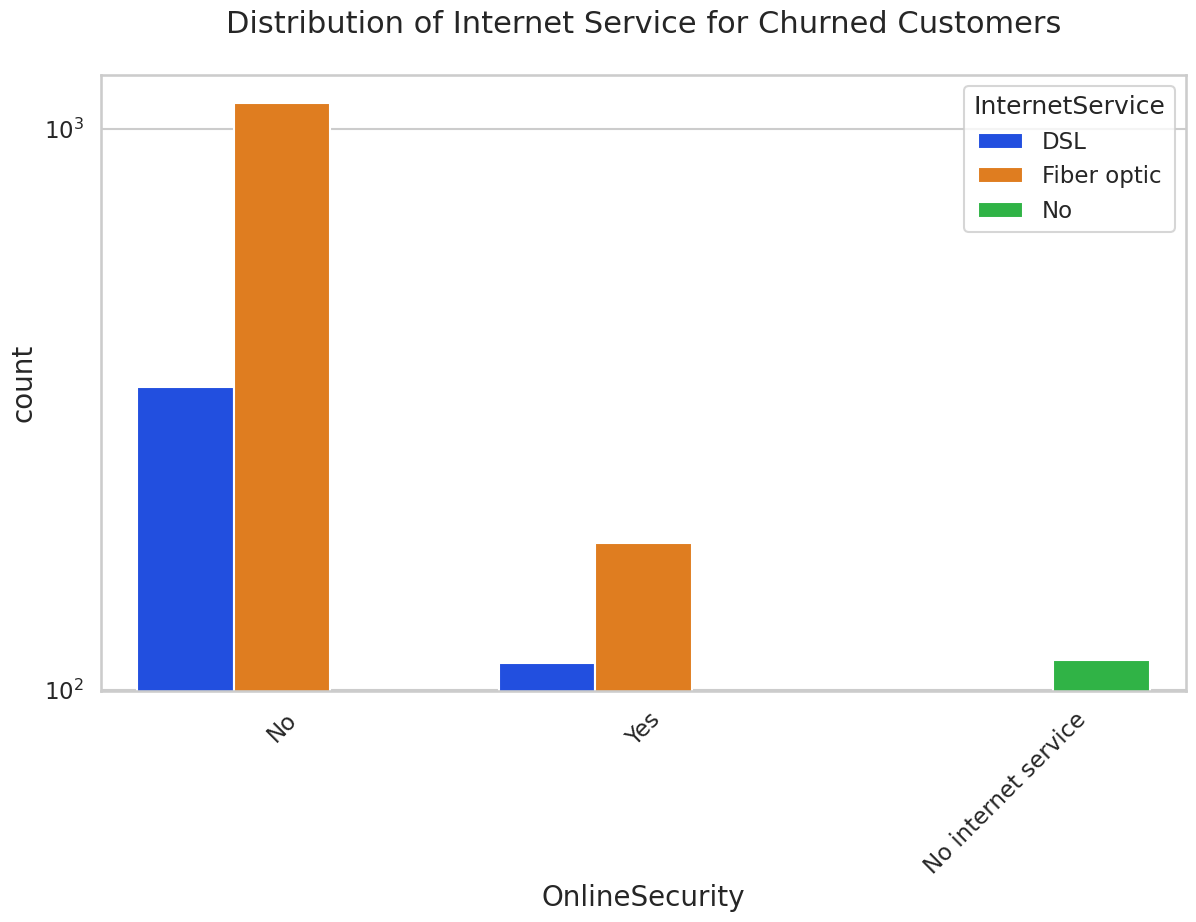

In [87]:
uniplot(new_df1_target1,col='OnlineSecurity',title='Distribution of Internet Service for Churned Customers',hue='InternetService')

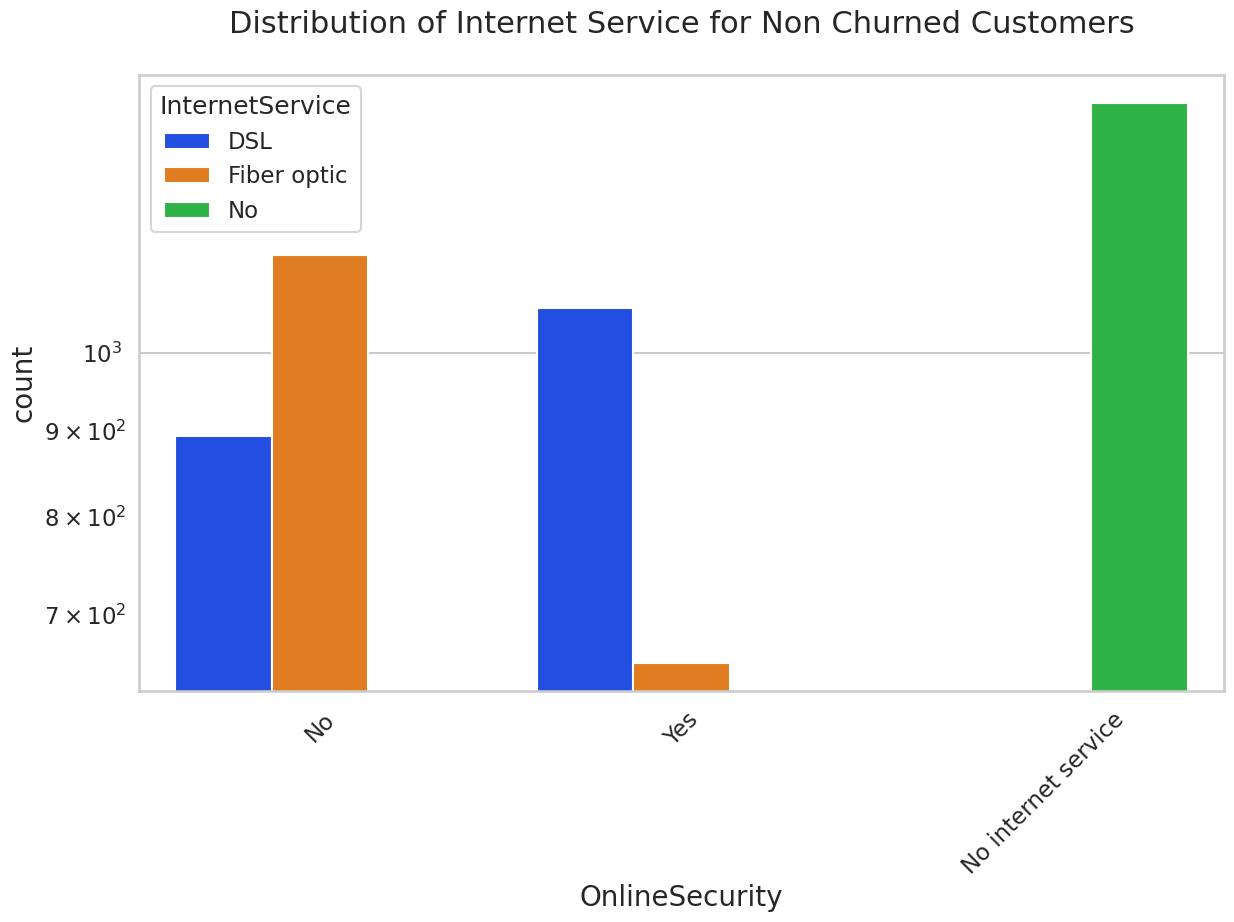

In [88]:
uniplot(new_df1_target0,col='OnlineSecurity',title='Distribution of Internet Service for Non Churned Customers',hue='InternetService')

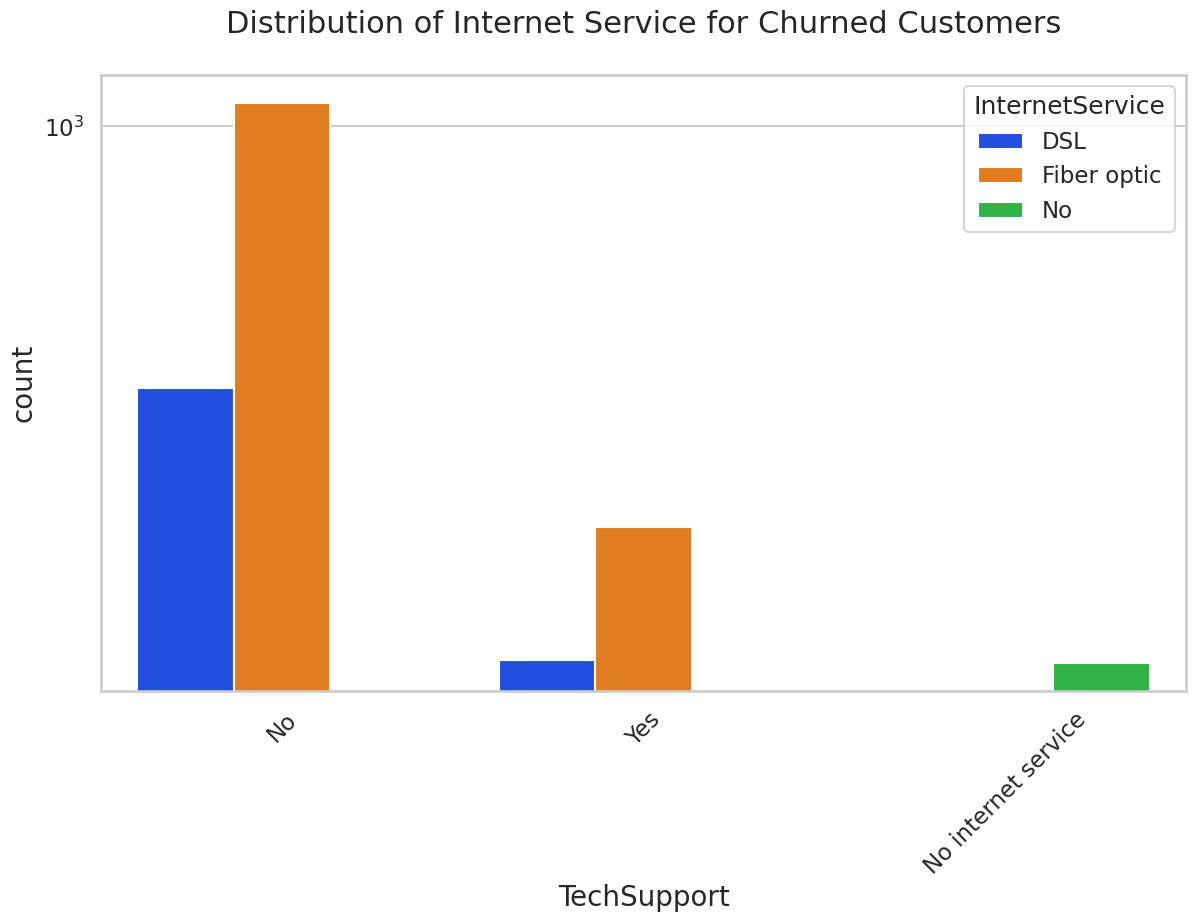

In [89]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of Internet Service for Churned Customers',hue='InternetService')

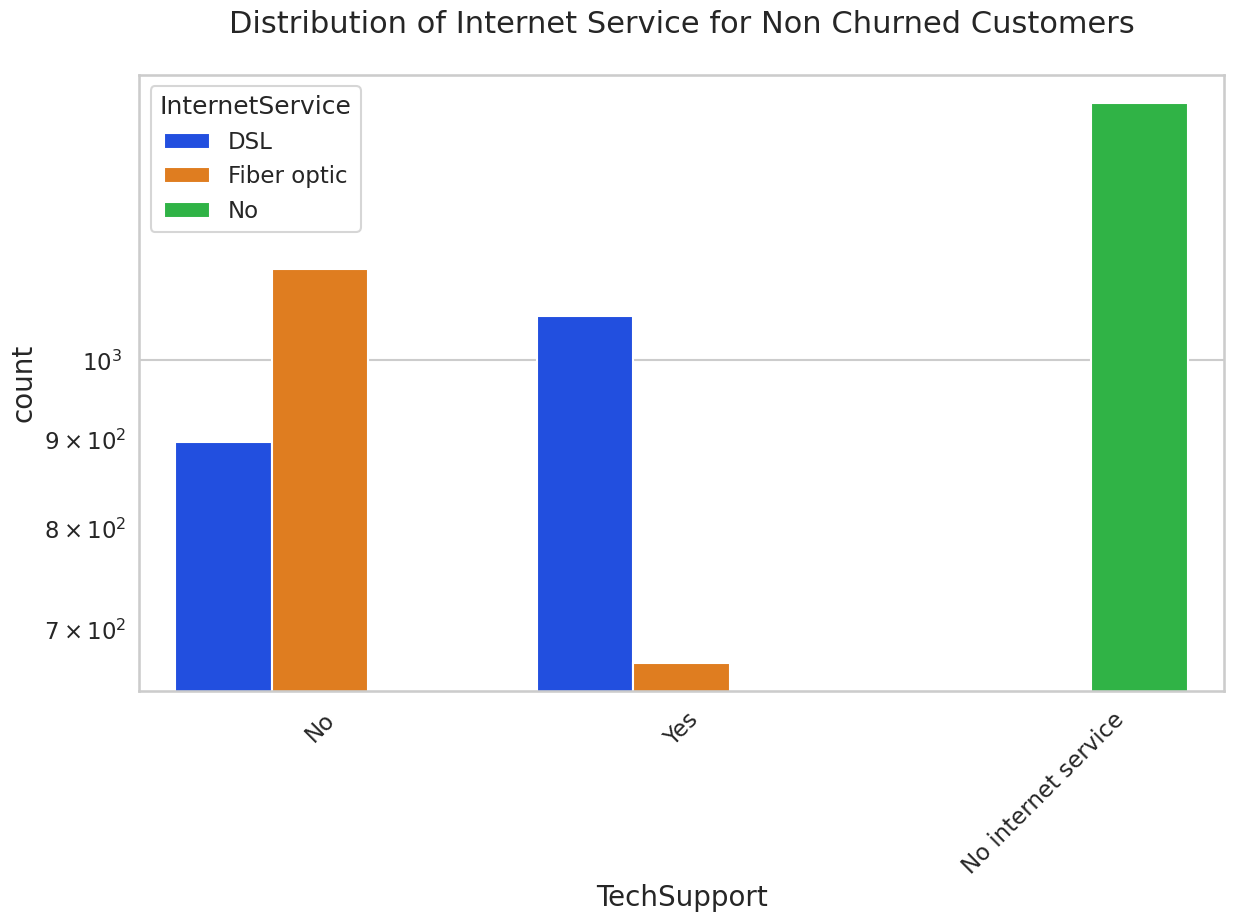

In [90]:
uniplot(new_df1_target0,col='TechSupport',title='Distribution of Internet Service for Non Churned Customers',hue='InternetService')

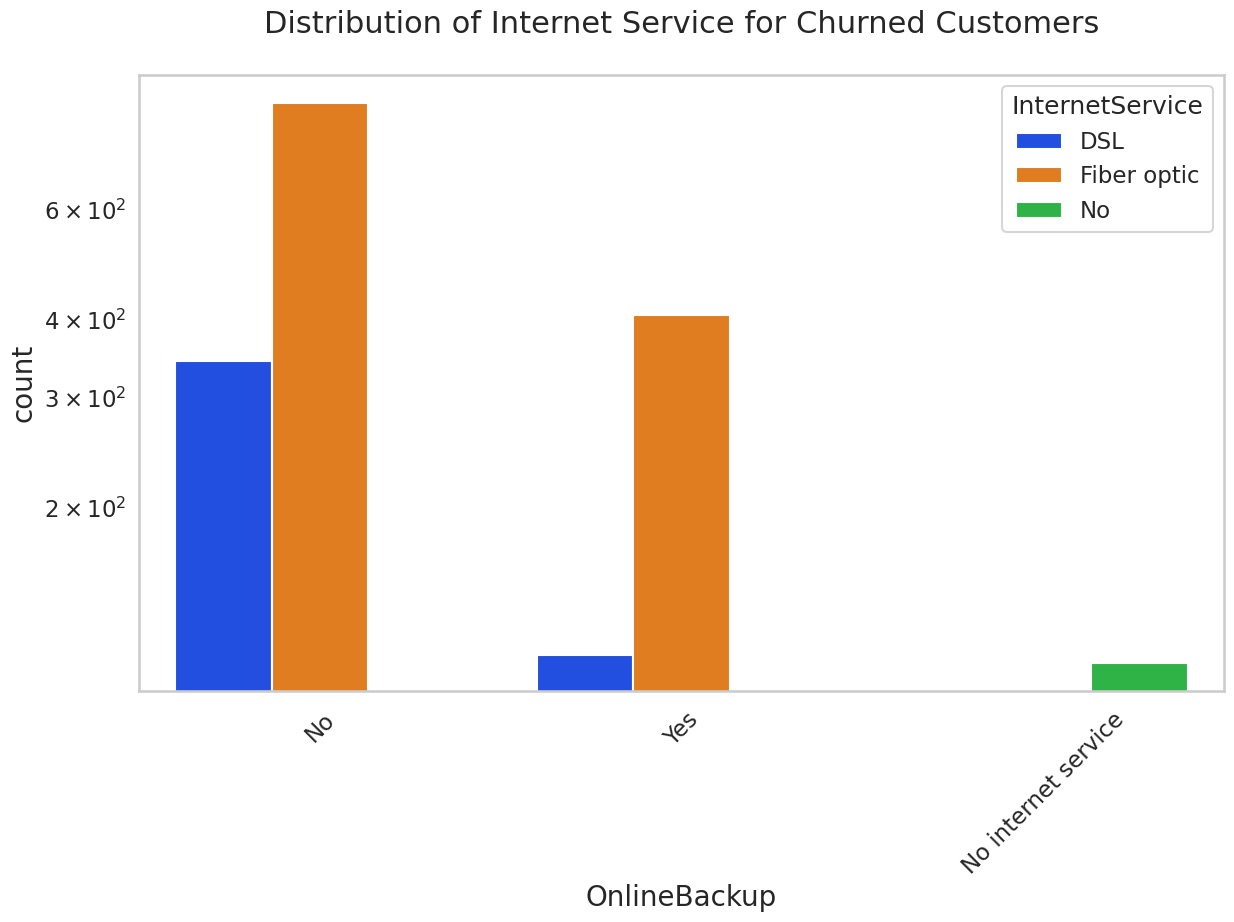

In [91]:
uniplot(new_df1_target1,col='OnlineBackup',title='Distribution of Internet Service for Churned Customers',hue='InternetService')

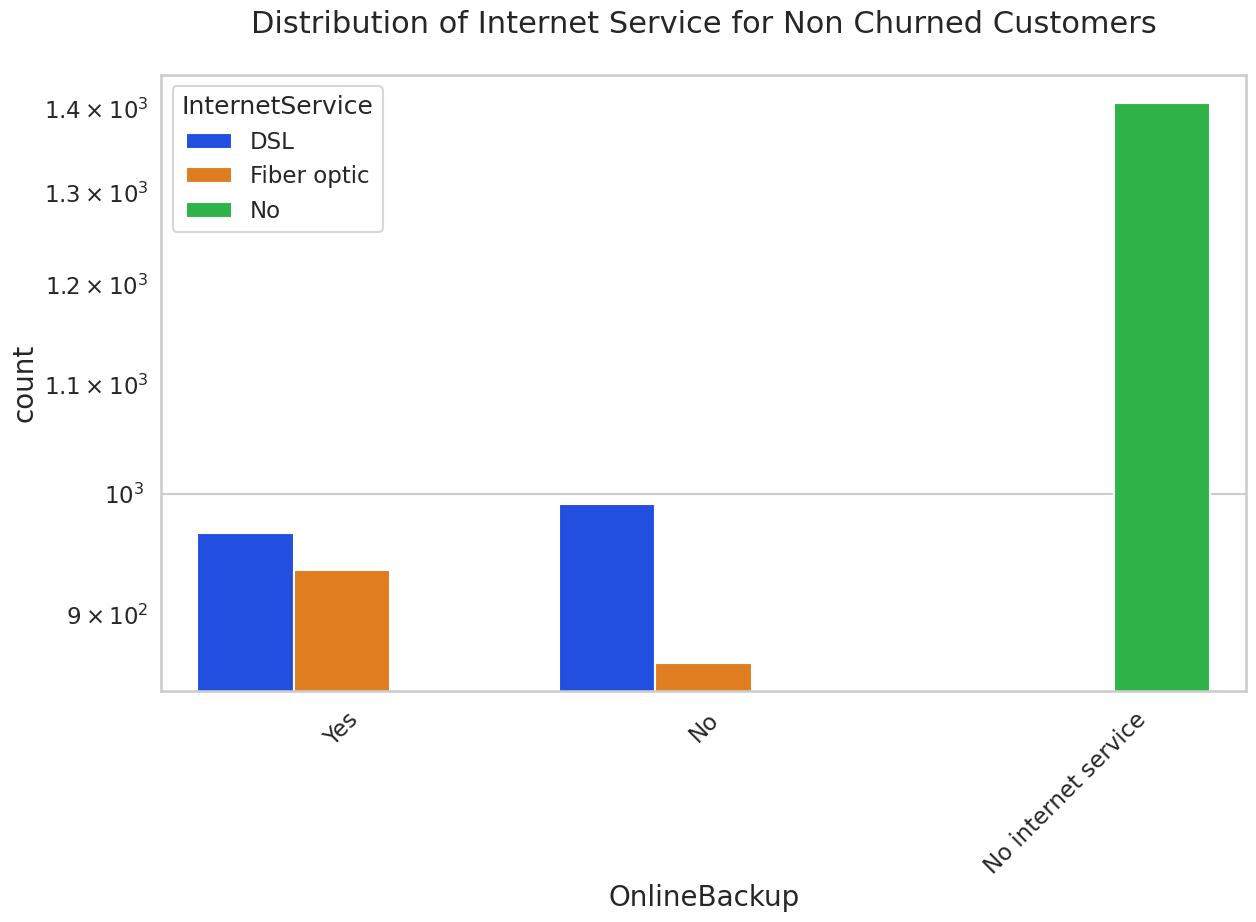

In [92]:
uniplot(new_df1_target0,col='OnlineBackup',title='Distribution of Internet Service for Non Churned Customers',hue='InternetService')

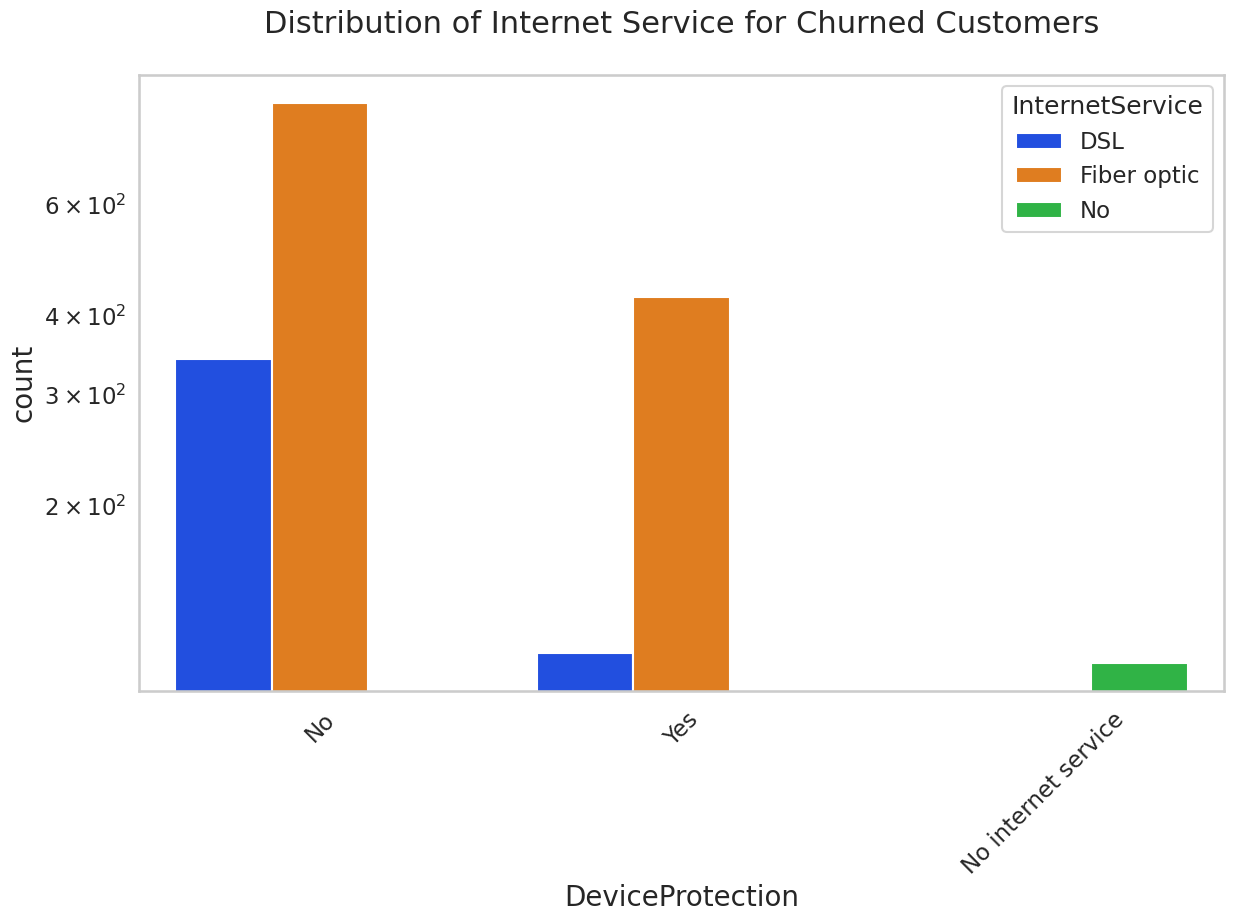

In [93]:
uniplot(new_df1_target1,col='DeviceProtection',title='Distribution of Internet Service for Churned Customers',hue='InternetService')

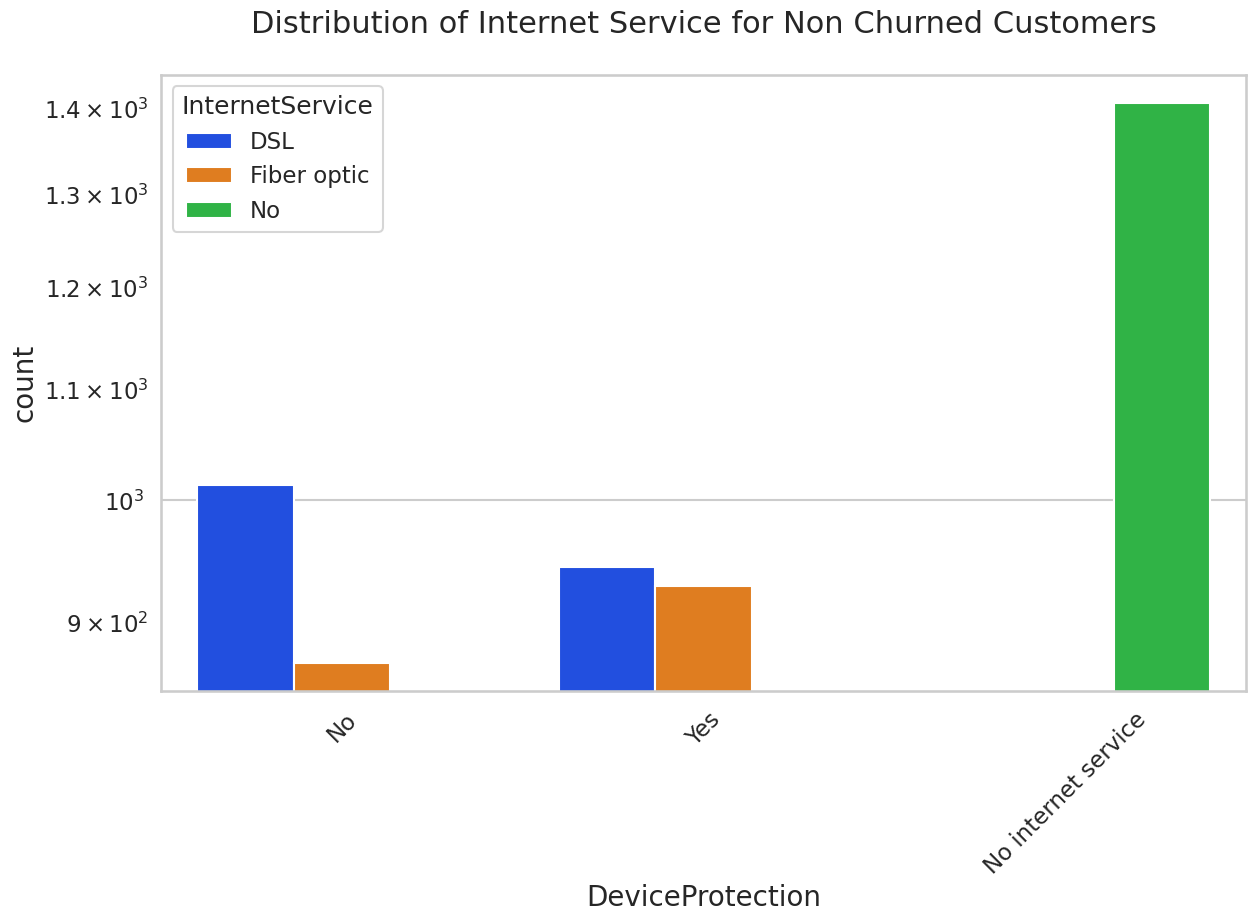

In [94]:
uniplot(new_df1_target0,col='DeviceProtection',title='Distribution of Internet Service for Non Churned Customers',hue='InternetService')

##- Regardless of gender, customers using Fibre optic service are more likely to churn.
##- Most active members both males and females prefer DSL.
##- Churn rate is very low with No Internet subscription.
##- Customers without Online security, No Tech support, No Online Backup and No ##- Device protection show higher tendancy to churn compared to those without any internet connection.
##**If Internet service users opt for DSL service churn rate can be controlled.**
##**Users opting for Internet subscription should be offered online services such as Tech Support, Online Security, Online Backup and Device protection.**




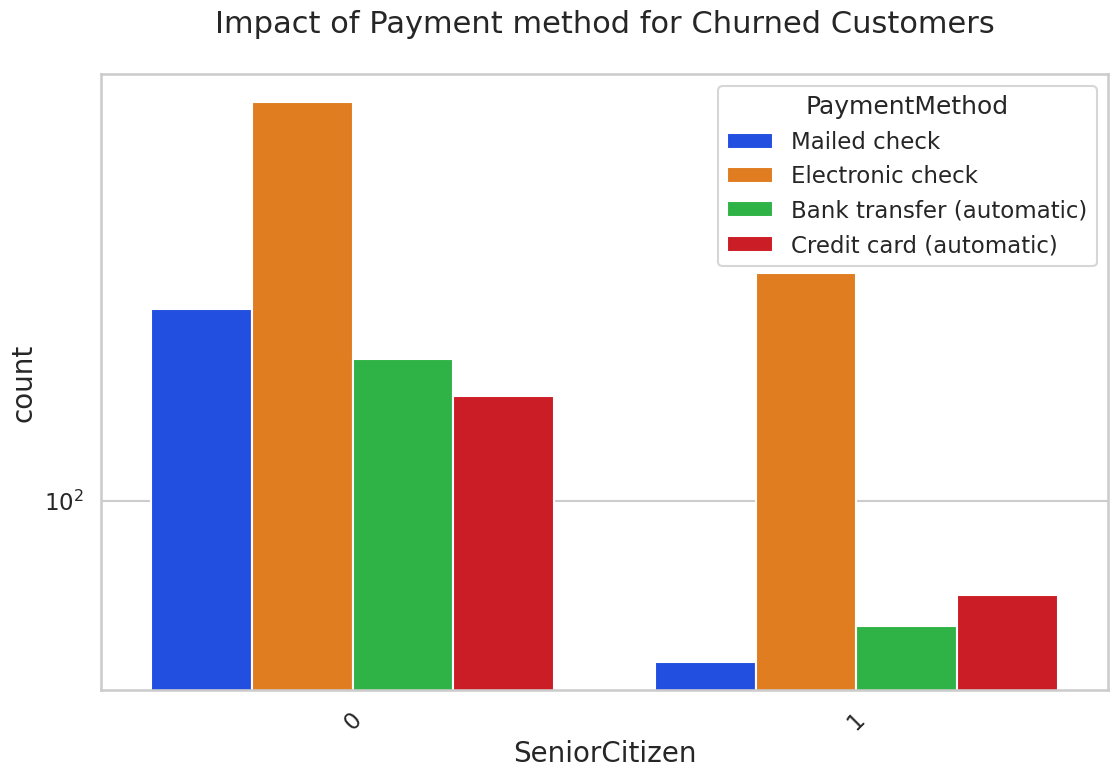

In [ ]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Impact of Payment method for Churned Customers',hue='PaymentMethod')

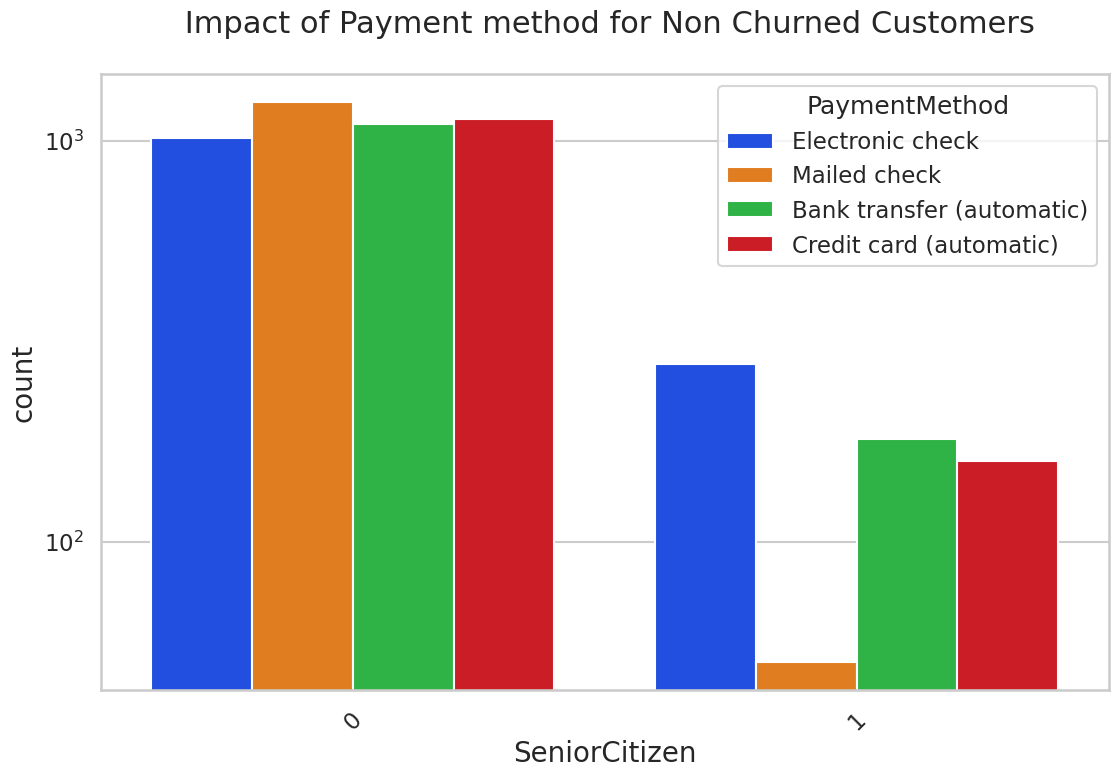

In [95]:
uniplot(new_df1_target0,col='SeniorCitizen',title=' Impact of Payment method for Non Churned Customers',hue='PaymentMethod')

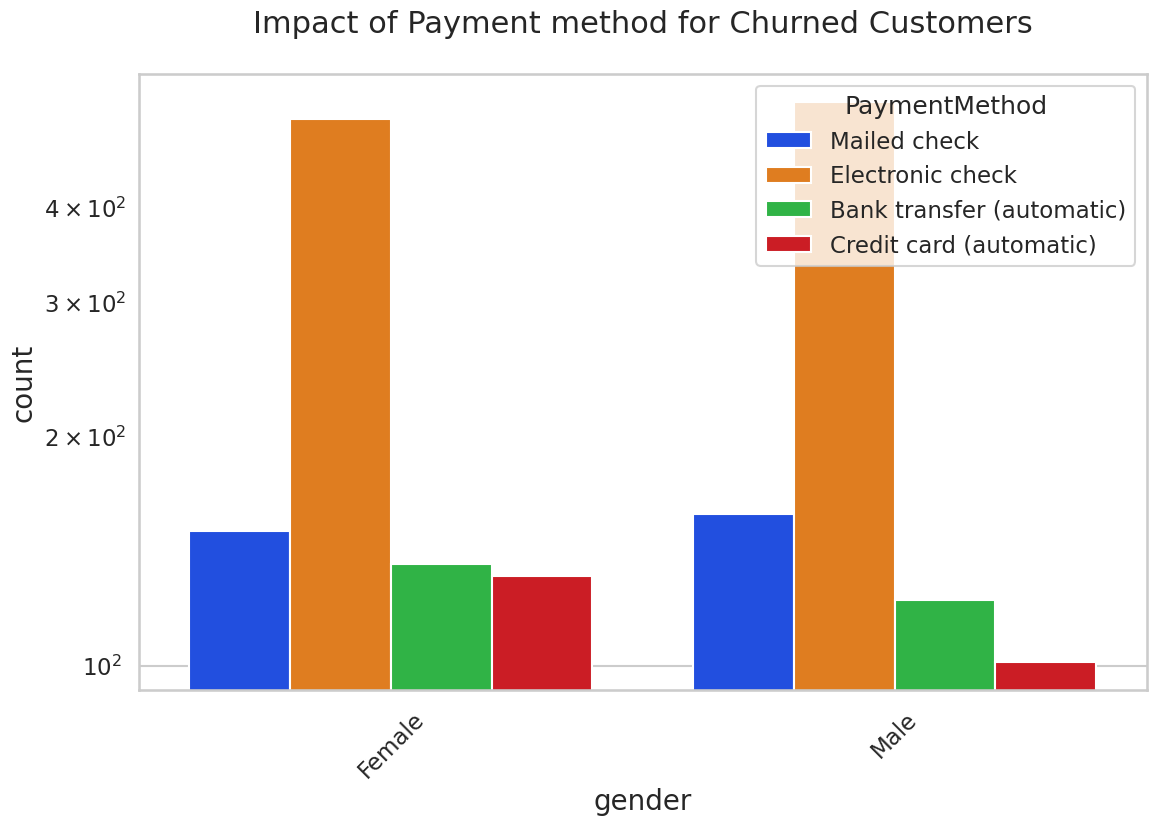

In [96]:
uniplot(new_df1_target1,col='gender',title='Impact of Payment method for Churned Customers',hue='PaymentMethod')

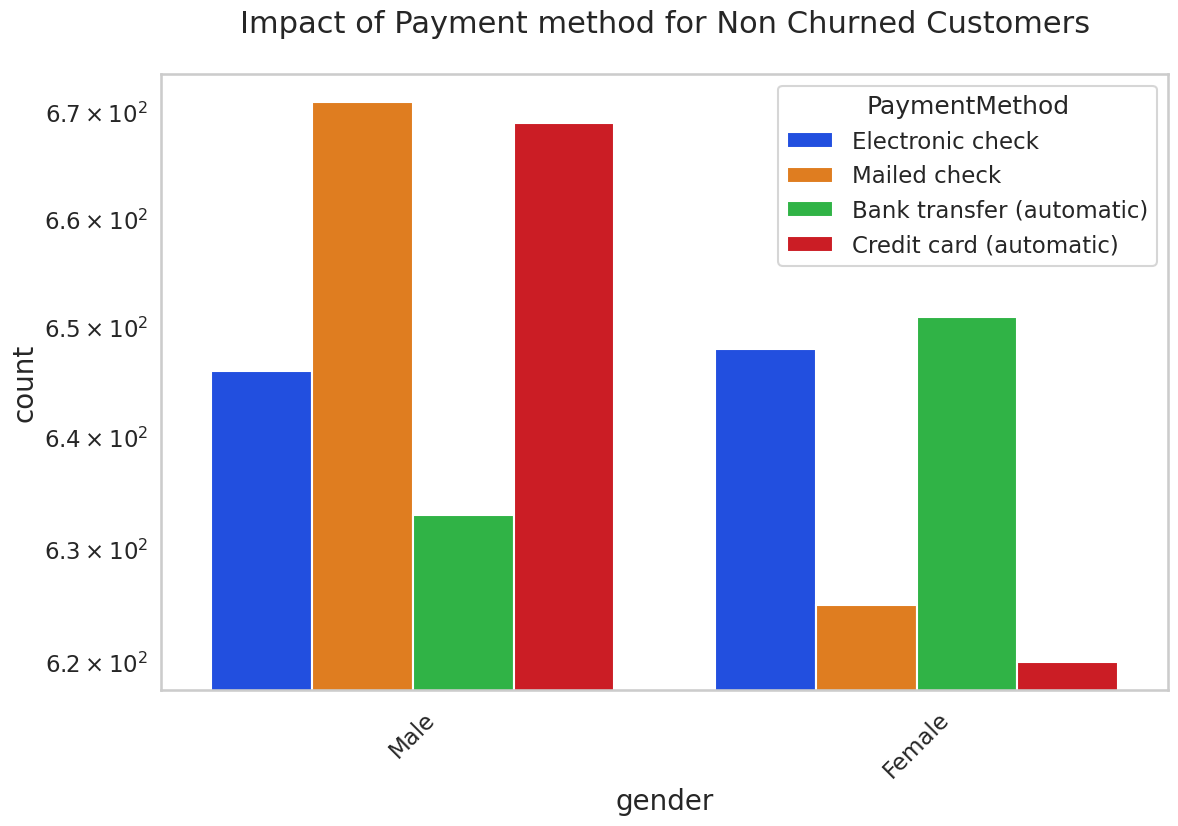

In [97]:
uniplot(new_df1_target0,col='gender',title='Impact of Payment method for Non Churned Customers',hue='PaymentMethod')

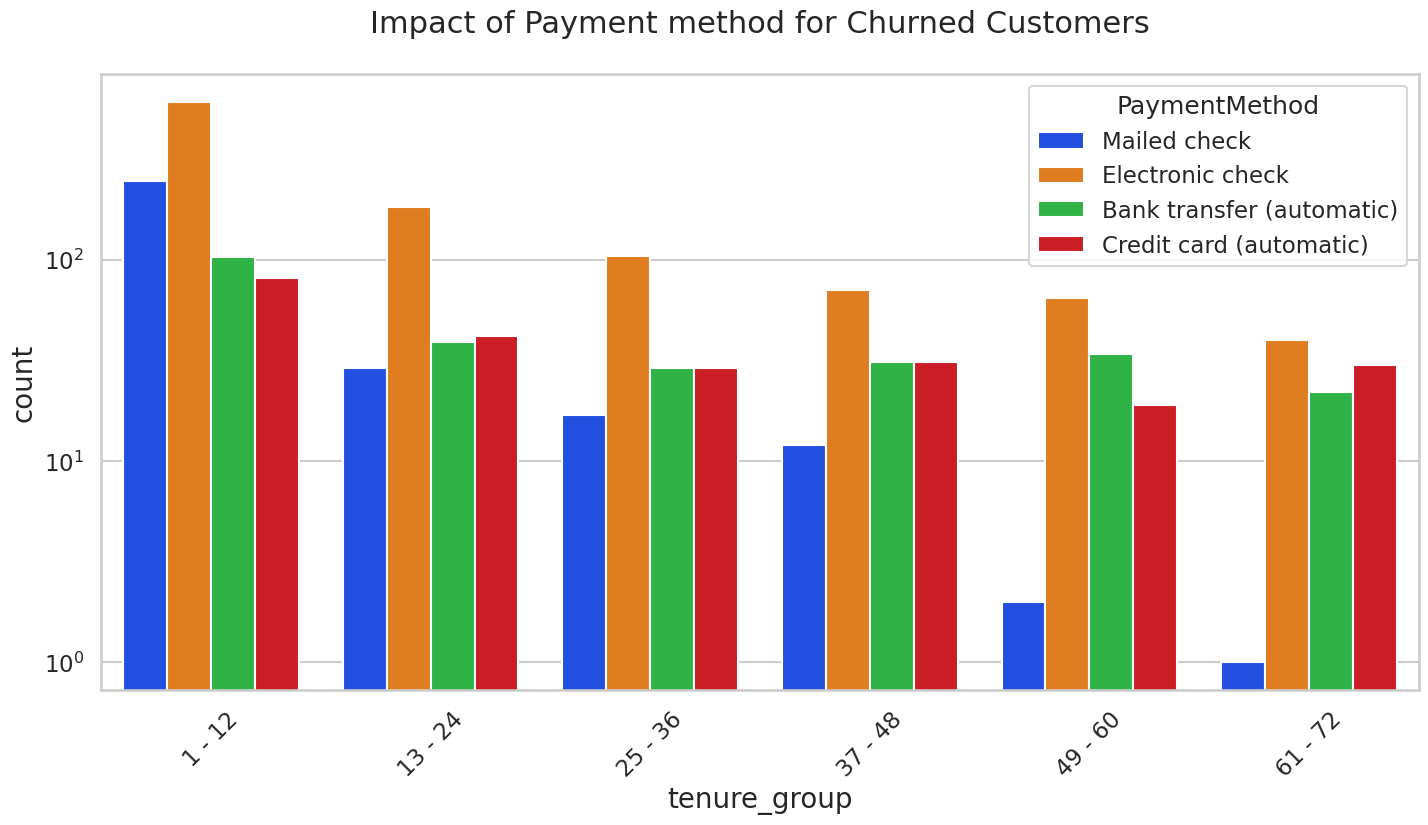

In [98]:
uniplot(new_df1_target1,col='tenure_group',title='Impact of Payment method for Churned Customers',hue='PaymentMethod')

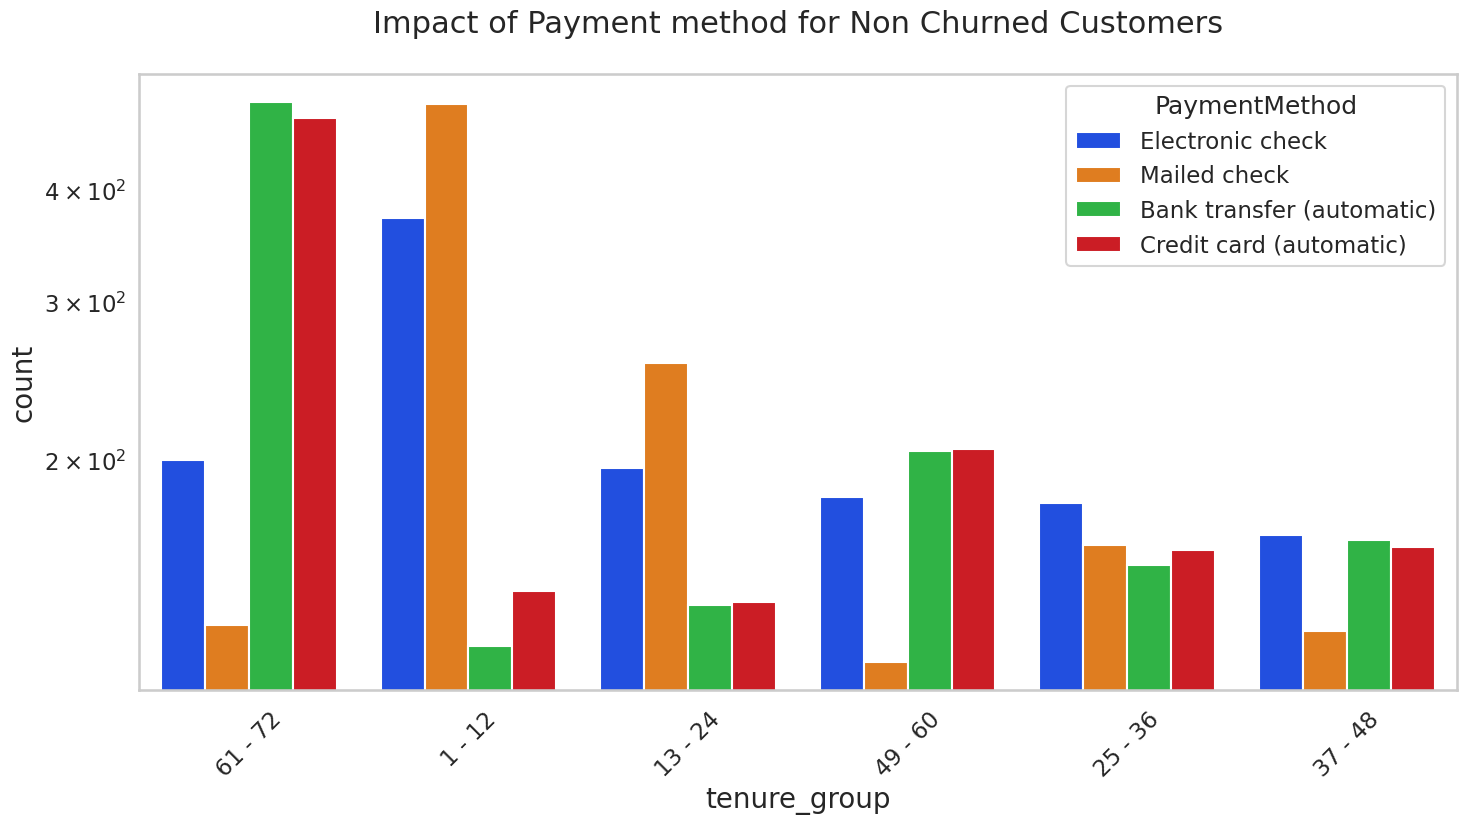

In [99]:
uniplot(new_df1_target0,col='tenure_group',title='Impact of Payment method for Non Churned Customers',hue='PaymentMethod')

##- Customers using Electronic check payment methods are more likely to churn regardless of age, gender or tenure length.
##- Senior citizens using electronic check payment are more likely to churn.
##- Females paying via credit card show increased tendency to churn.


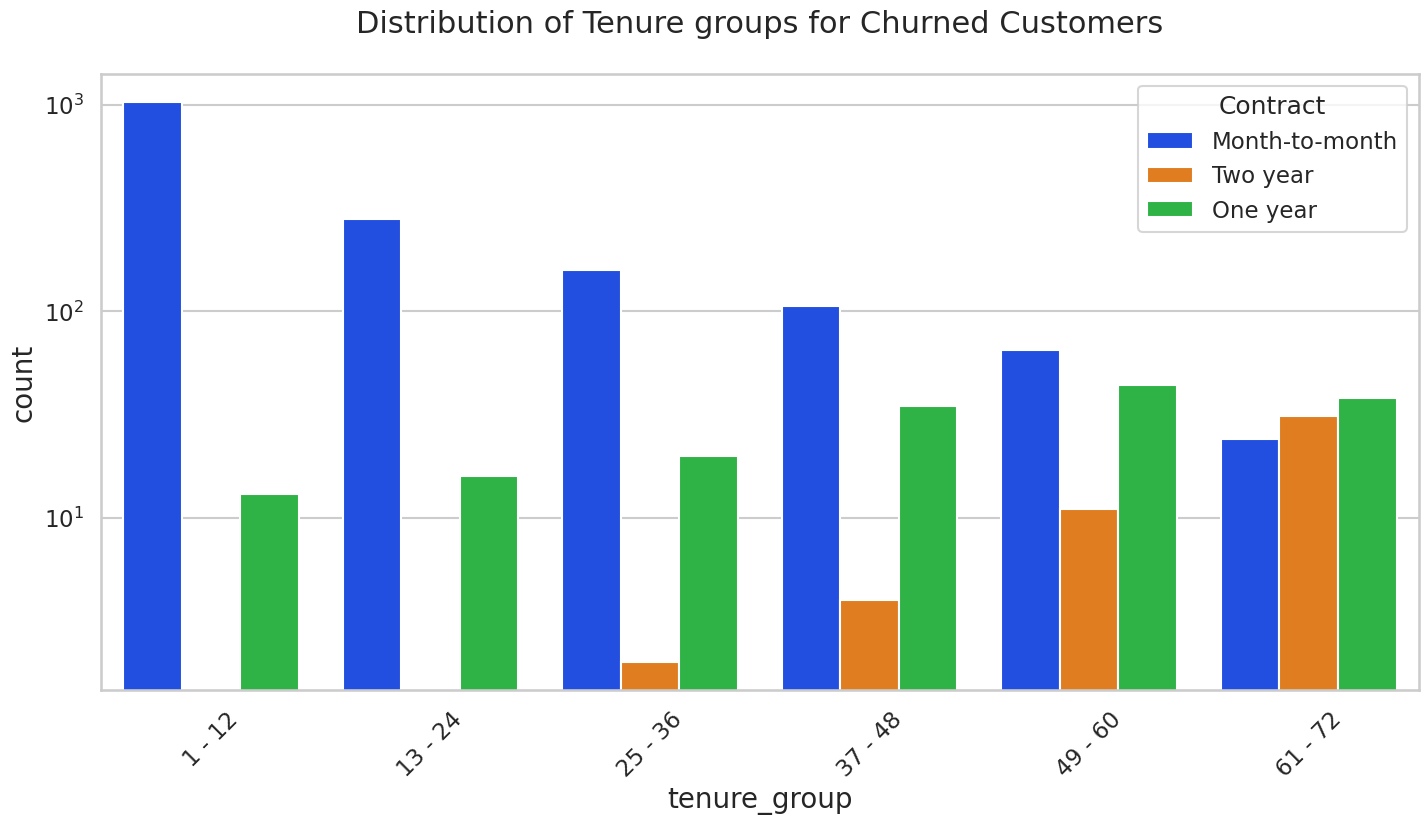

In [100]:
uniplot(new_df1_target1,col='tenure_group',title='Distribution of Tenure groups for Churned Customers',hue='Contract')

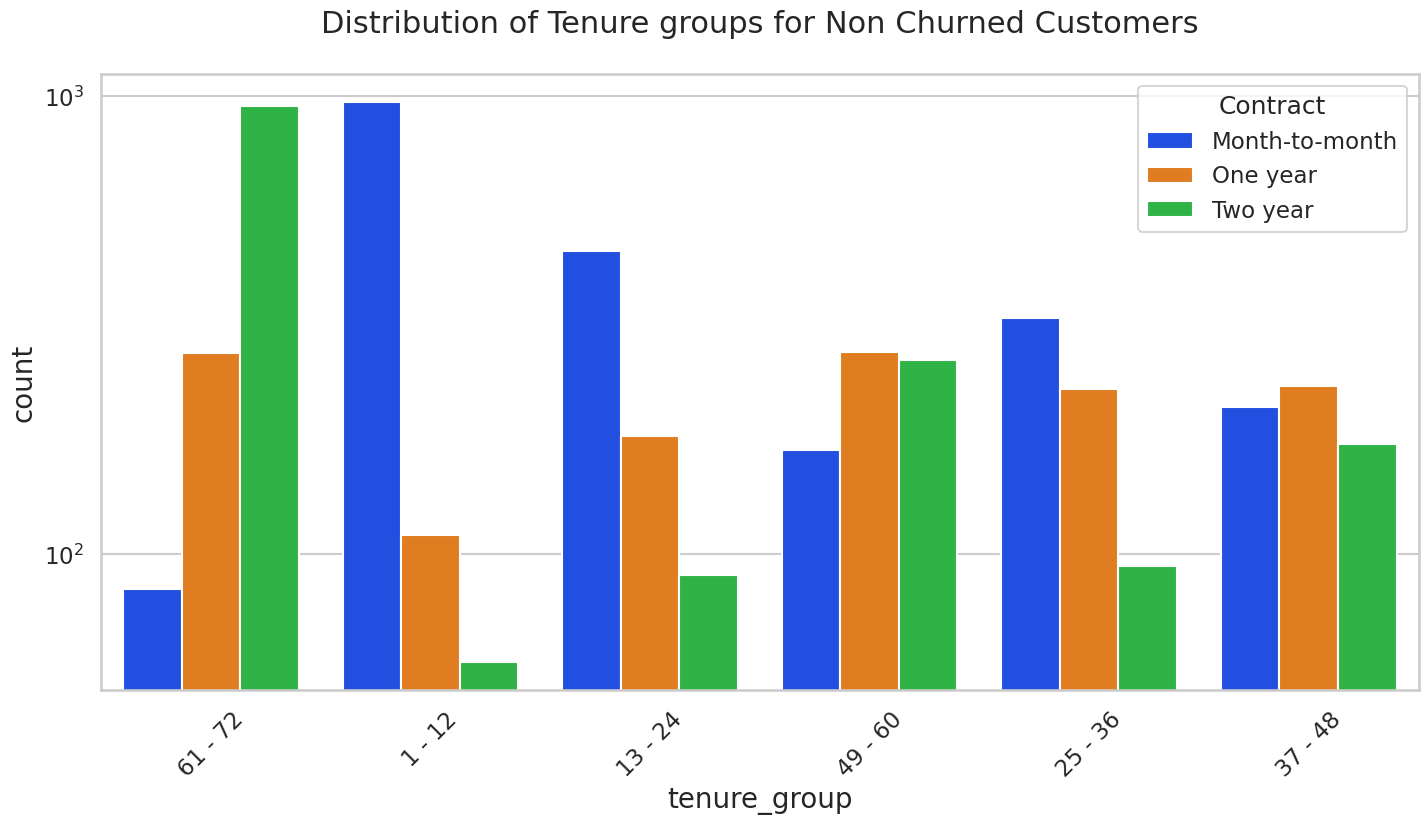

In [101]:
uniplot(new_df1_target0,col='tenure_group',title='Distribution of Tenure groups for Non Churned Customers',hue='Contract')

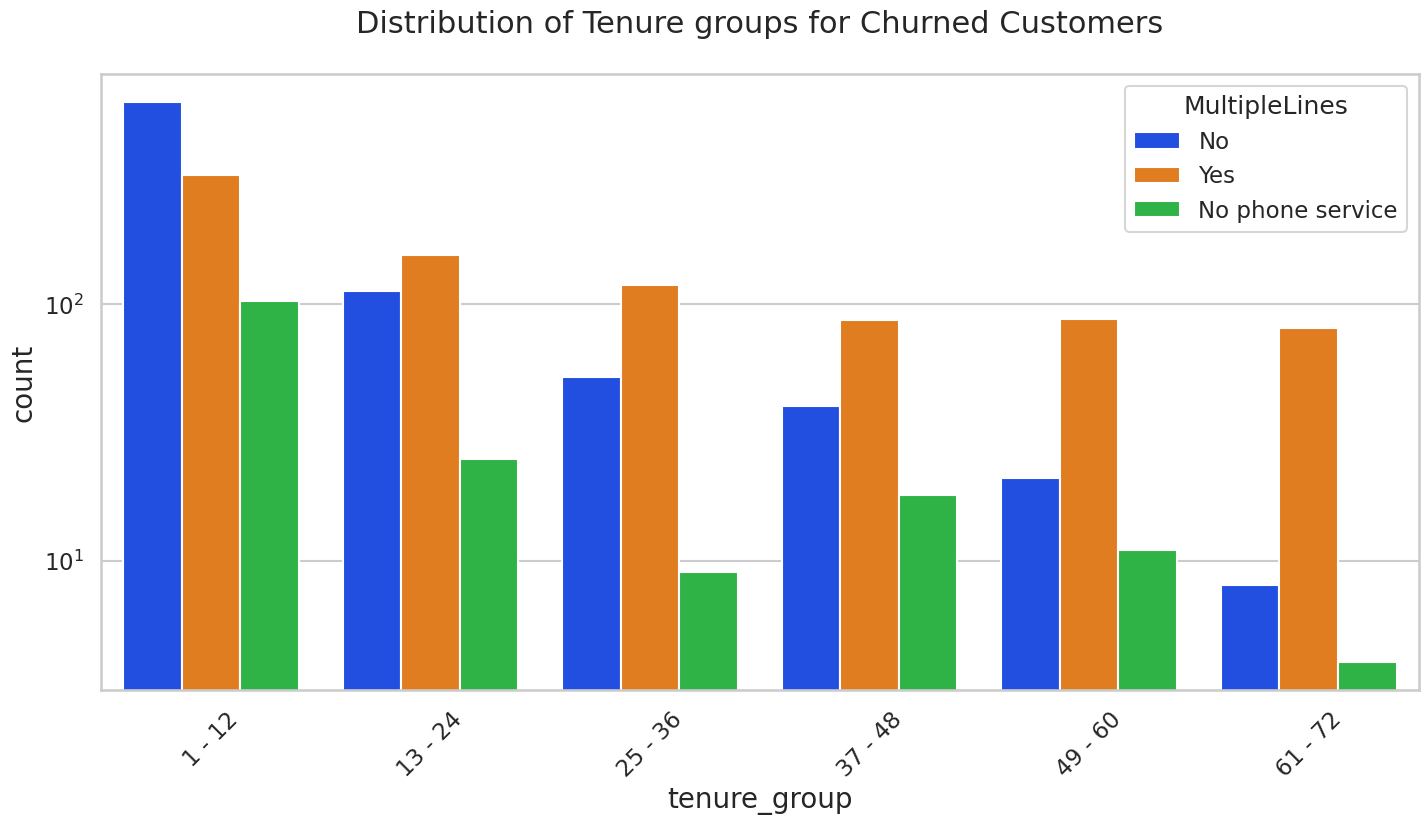

In [102]:
uniplot(new_df1_target1,col='tenure_group',title='Distribution of Tenure groups for Churned Customers',hue='MultipleLines')

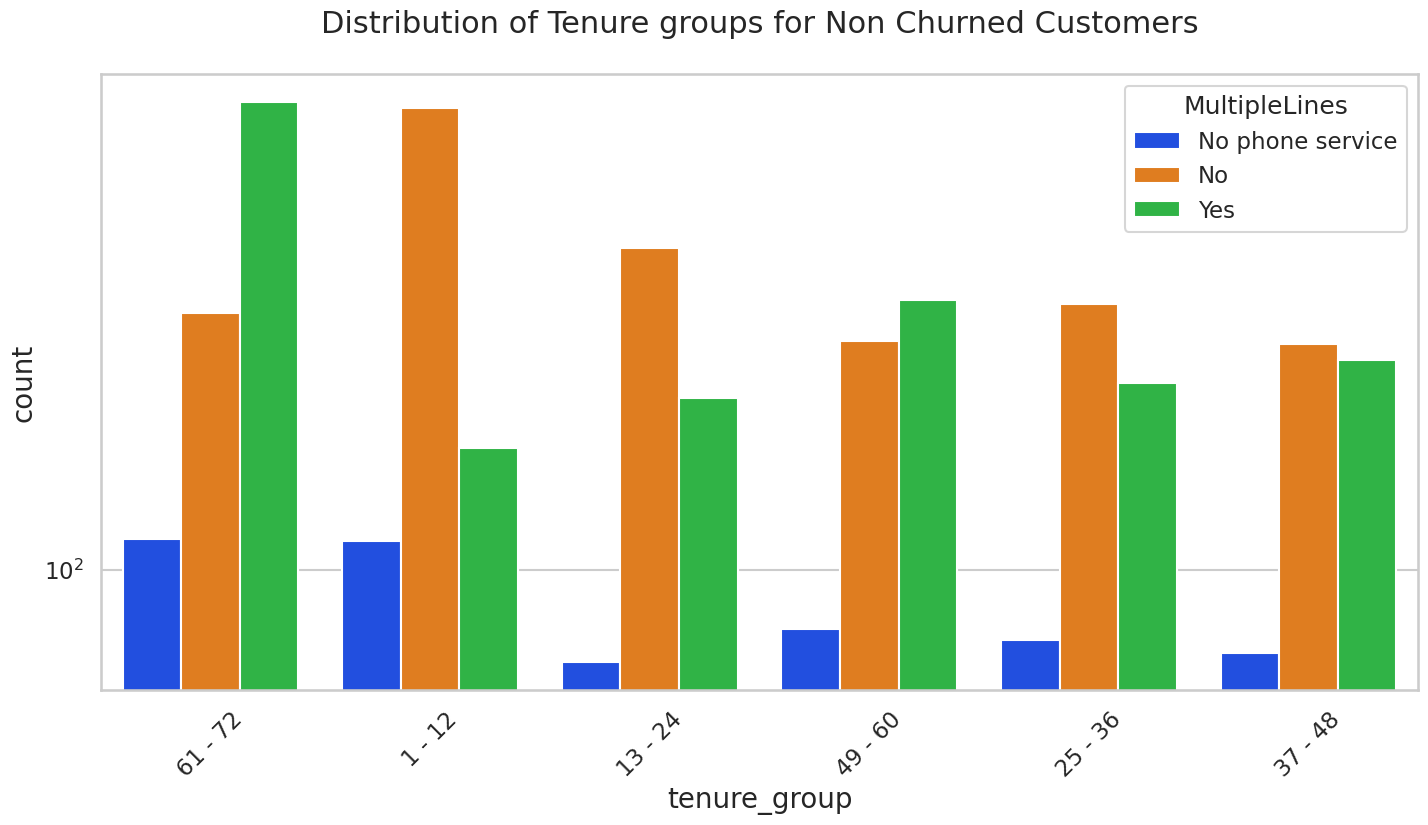

In [103]:
uniplot(new_df1_target0,col='tenure_group',title='Distribution of Tenure groups for Non Churned Customers',hue='MultipleLines')

##- Consumers on month to month contract are more likely to churn regardless of their tenure length and usage of multiple lines.


##**Bivariate Analysis Findings:**
- Gender does not have any significant impact on tendancy to churn.
- Customers without Online security, No Tech support, No Online Backup and No Device protection show higher tendancy to churn compared to those without any internet connection.
- Customers using Fibre optic service are more likely to churn.
- Churn rate is very low with No Internet subscription.
- Consumers on month to month contract are more likely to churn regardless of their tenure length and usage of multiple lines.
- Customers using Electronic check payment methods are more likely to churn regardless of age, gender or tenure length.

#**CONCLUSION:**
###**High Churn:**
- Customers who lack Online security, Tech support, Online Backup and Device protection show higher tendancy to churn compared to those without an active internet connection.
- Customers using Fibre optic service are more likely to churn.
- Consumers on month to month contract are more likely to churn regardless of their tenure length and whether they use multiple lines.
- Elevated monthly charges, shorter tenure, and lower total charges are associated with a high churn rate.
- Regardless of age, gender, or tenure length, customers using electronic check payment methods are more prone to churning.
- Senior citizens have an elevated likelihood of churning..
- Customers falling within the 1-12 month tenure range have a higher tendency to churn.
###**Low Churn:**
- Users with a lengthy tenure demonstrate a lower likelihood of churning.
- The churn rate is minimal among those who do not have an active internet subscription.
###**No Impact:**
- Factors like Gender, Availability of PhoneService and multiple lines have insignificant impact on churn.








